# **Projeto de CCF 425 - Introdução à Ciência de Dados**

## Introdução

Neste projeto, realizaremos um estudo baseado no conjunto de dados BrStats, disponibilizado pelo Prof. Fabrício e pelo monitor João Marcos, além de quatro outros conjuntos de dados selecionados pelo grupo (casos_2020, casos_2021, casos_2022 e casos_2023). O objetivo é analisar os impactos da pandemia de Covid-19 no Brasil e investigar possíveis relações entre as características socioeconômicas das cidades e o nível de impacto da pandemia.

O primeiro conjunto de dados, **"BrStats: A Socioeconomic Statistics Dataset of the Brazilian Cities"**, contém informações estatísticas sobre cidades brasileiras, compiladas a partir de fontes como IBGE, IPEA e DATASUS. Entre os indicadores disponíveis, destacam-se:

- PIB
- População
- Receitas municipais
- Dados sobre nascimentos e óbitos infantis
- Entre outros fatores que ajudam a compreender o desenvolvimento dessas localidades.

Diante da pandemia global da Covid-19, que impactou todas as regiões do mundo, este estudo busca explorar como diferentes cidades brasileiras foram afetadas. Com base nos dados coletados, investigaremos se há correlação entre as características socioeconômicas das cidades e a severidade dos impactos causados pela pandemia, contribuindo para uma melhor compreensão dos fatores que influenciaram a propagação e os efeitos da doença no Brasil.

---

## Divisão das Tarefas entre os Membros da Equipe

### Entrega 01:
- **Henrique Alves**: Elaboração de algumas perguntas
- **Marcos Biscotto**: Elaboração de algumas perguntas e Análises Iniciais
- **Matheus Nogueira**: Elaboração de algumas perguntas
- **Matheus Peixoto**: Obtenção dos Dados, Análises Iniciais e Organização do GitHub

### Entrega 02:
- **Henrique Alves**: Elaboração de alguns gráficos e reorganização de parte do notebook
- **Marcos Biscotto**: Reorganização de parte do Notebook conforme as observações passadas à equipe, Elaboração de alguns gráficos e Reformulação de Perguntas
- **Matheus Nogueira**: Elaboração de alguns gráficos
- **Matheus Peixoto**: Reorganização de parte do Notebook conforme as observações passadas à equipe e GitHub

### Entrega 03:
- **Henrique Alves**: Auxílio nas análises referente à terceira entrega
- **Marcos Biscotto**: Melhoria da formatação do texto e correção do Markdown, reorganização da estrutura do notebook, melhoria na legibilidade e refatoração de alguns gráficos.
- **Matheus Nogueira**: Análises referentes à terceira entrega
- **Matheus Peixoto**: Organização do notebook, alguns testes pra análises dessa terceira entrega como inferências e outras estatísticas

---

## Entendimento Inicial dos Dados

Nessa seção iremos importar os dados, buscando realizar uma primeira análise do Dataset. Para tal, utilizaremos a biblioteca pandas e numpy.

In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

##Importação do Arquivo BrStats.csv

Para a realização do próximo passo, importe o arquivo disponibilizado no Capítulo 4 do artigo "BrStats: a socioeconomic statistics dataset of the Brazilian cities" com o nome "BrStats.csv".

Devido suas características, foi preciso passar como parâmetro a separação utilizando ponto e vírgula, bem como a opção low_memory=False, para que o GoogleColab consiga lidar com esse grande volume de dados.

In [ ]:
df_br = pd.read_csv('BrStats.csv', sep=";", low_memory=False)
print(df_br.dtypes)
print(f"BrStats: {df_br.shape[0]} linhas, {df_br.shape[1]} colunas")

Ano                              int64
CDMunicipio                      int64
Populacao                       object
PessoalOcupado                  object
PessoalAssalariado              object
VrSalarios                      object
PIB                             object
QtEmpresas                     float64
AreaPlantada_h                 float64
AreaColhida_h                  float64
VlProducaoAgricola             float64
VlProducaoPecuaria             float64
Area                            object
Importacoes_US$                 object
Exportacoes_US$                 object
Receitas_R$                     object
Transferencias_correntes_R$     object
Transferencias_capital_R$       object
NrNascimentos                  float64
NrObitosInfantis               float64
povoamento                      object
UF                              object
Municipio                       object
Regiao                          object
dtype: object
BrStats: 33420 linhas, 24 colunas


##Extraindo as colunas com vírgula

A partir dessa extração, saberemos quais colunas tratar para melhorar nossa análise dos dados.

In [ ]:
colunas_com_virgula = df_br.columns[df_br.apply(lambda col: col.astype(str).str.contains(',', na=False).any())]
print(colunas_com_virgula)

Index(['Area', 'Importacoes_US$', 'Exportacoes_US$', 'Receitas_R$',
       'Transferencias_correntes_R$', 'Transferencias_capital_R$',
       'povoamento'],
      dtype='object')


##Pré-processamento de Dados

**Conversão de Tipos de Dados**

Identificamos colunas numéricas armazenadas como texto devido a:



*   Uso de vírgulas como separador decimal
*   Pontos como separador de milhares
*   Valores ausentes representados como espaços em branco

Solução implementada:

In [ ]:
colunas_numericas_float = ['Area', 'Importacoes_US$', 'Exportacoes_US$', 'Receitas_R$',
                     'Transferencias_correntes_R$', 'Transferencias_capital_R$', 'povoamento']

colunas_numericas_int = ['Populacao', 'PessoalOcupado', 'PessoalAssalariado', 'VrSalarios',
                     'PIB', 'QtEmpresas','AreaPlantada_h', 'AreaColhida_h', 'VlProducaoAgricola', 'NrNascimentos',
                         'VlProducaoPecuaria', 'NrObitosInfantis']



df_br[colunas_numericas_float] = df_br[colunas_numericas_float].apply(lambda x:
    x.astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
    .replace('nan', None).astype(float)
)


df_br[colunas_numericas_int] = df_br[colunas_numericas_int].apply(lambda x:
    x.astype(str).str.replace('.', '', regex=False).replace('nan', '0')
    .fillna(0).astype(int)
)


print(df_br.dtypes)
print(f"BrStats: {df_br.shape[0]} linhas, {df_br.shape[1]} colunas")

Ano                              int64
CDMunicipio                      int64
Populacao                        int64
PessoalOcupado                   int64
PessoalAssalariado               int64
VrSalarios                       int64
PIB                              int64
QtEmpresas                       int64
AreaPlantada_h                   int64
AreaColhida_h                    int64
VlProducaoAgricola               int64
VlProducaoPecuaria               int64
Area                           float64
Importacoes_US$                float64
Exportacoes_US$                float64
Receitas_R$                    float64
Transferencias_correntes_R$    float64
Transferencias_capital_R$      float64
NrNascimentos                    int64
NrObitosInfantis                 int64
povoamento                     float64
UF                              object
Municipio                       object
Regiao                          object
dtype: object
BrStats: 33420 linhas, 24 colunas


**Resultado:**

- Colunas numéricas convertidas para float ou int
- Valores ausentes padronizados como 0
- Dados prontos para análise quantitativa

Com os dados tratados desta forma, a análise dos mesmos e a obtenção de informações a partir deles ocorrerá de forma mais precisa.

##Descrição do Conjunto de Dados - BrStats

No documento fornecido são informadas as colunas presentes no conjunto de dados. Na tabela abaixo apresentamos cada uma com uma breve descrição:

| Coluna                      | Descrição                                                                                      |
|----------------------------|------------------------------------------------------------------------------------------------|
| Ano                        | Ano de referência dos dados.                                                                   |
| CDMunicipio                | Código do município conforme a base oficial.                                                   |
| Populacao                  | Número total de habitantes do município.                                                       |
| PessoalOcupado             | Pessoas empregadas (formais e informais).                                                      |
| PessoalAssalariado         | Pessoas empregadas formalmente (com salário).                                                  |
| VrSalarios                 | Valor total da massa salarial paga no município.                                               |
| PIB                        | Produto Interno Bruto do município.                                                            |
| QtEmpresas                 | Quantidade total de empresas registradas.                                                      |
| AreaPlantada_h             | Área total plantada na agricultura.                                                            |
| AreaColhida_h              | Área total colhida na agricultura.                                                             |
| VlProducaoAgricola         | Valor total da produção agrícola.                                                              |
| VlProducaoPecuaria         | Valor total da produção pecuária.                                                              |
| Area                       | Área total do município (em km²).                                                              |
| Importacoes_US             | Valor total das importações em dólares americanos.                                                        |
| Exportacoes_US             | Valor total das exportações em dólares americanos.                                                        |
| Receitas_R                 | Receita total do município em reais.                                                           |
| Transferencias_correntes_R| Valor recebido por transferências correntes.                                                   |
| Transferencias_capital_R   | Valor recebido por transferências de capital.                                                  |
| NrNascimentos              | Número total de nascimentos registrados.                                                       |
| NrObitosInfantis           | Número total de óbitos infantis registrados.                                                   |
| povoamento                 | Densidade demográfica (pessoas por km²).                                            |
| UF                         | Sigla do estado do município (ex: MG, SP, BA).                                                                  |
| Municipio                  | Nome do município.                                                                             |
| Regiao                     | Região geográfica do município (Norte, Nordeste, Sul, Sudeste, Centro-Oeste).

Tendo conhecimento dessas informações, realizaremos agora um detalhamento maior dessas colunas, apresentando, para cada uma, seu tipo, quantidade de valores nulos e únicos, e, para aquelas numéricas, apresentaremos também os valores mínimos e máximos encontrados, bem como a média e a mediana.

In [ ]:
desc_numericas = df_br.describe().T

nulos = df_br.isnull().sum()

tipos = df_br.dtypes

valores_unicos = df_br.nunique()

resumo = pd.DataFrame({
    'Tipo': tipos,
    'Nulos': nulos,
    'Valores únicos': valores_unicos,
    'Mínimo': desc_numericas['min'],
    'Máximo': desc_numericas['max'],
    'Média': desc_numericas['mean'],
    'Mediana': df_br.median(numeric_only=True)
})

resumo = resumo.fillna("-")

resumo

Tipo  Nulos  Valores únicos       Mínimo  \
Ano                            int64      0               6       2016.0   
Area                         float64     30            4514          3.6   
AreaColhida_h                  int64      0             570          0.0   
AreaPlantada_h                 int64      0             566          0.0   
CDMunicipio                    int64      0            5570    1100015.0   
Exportacoes_US$              float64  21392           11849          3.0   
Importacoes_US$              float64  20375           12871          1.0   
Municipio                     object      0            5297            -   
NrNascimentos                  int64      0            2868         10.0   
NrObitosInfantis               int64      0             236          0.0   
PIB                            int64      0           27062          0.0   
PessoalAssalariado             int64      0            8947          0.0   
PessoalOcupado                 int64      0            9615          0.0   
Populacao                      int64      0           22025          0.0   
QtEmpresas                     int64      0            3758          0.0   
Receitas_R$                  float64  11173           22247  9361471.068   
Regiao                        object      0               5            -   
Transferencias_capital_R$    float64    243           28973          0.0   
Transferencias_correntes_R$  float64    243           33077          0.0   
UF                            object      0              27            -   
VlProducaoAgricola             int64      0            1269          0.0   
VlProducaoPecuaria             int64      0             416          0.0   
VrSalarios                     int64      0           26490          0.0   
povoamento                   float64     30           27425        0.031   

                                         Máximo             Média  \
Ano                                      2021.0            2018.5   
Area                                   159533.4       1527.893836   
AreaColhida_h                            9980.0        275.966517   
AreaPlantada_h                           9980.0        274.628995   
CDMunicipio                           5300108.0    3253590.770736   
Exportacoes_US$                   13190038124.0   85726537.942883   
Importacoes_US$                   15230570784.0  104587613.419778   
Municipio                                     -                 -   
NrNascimentos                          169299.0       2136.781568   
NrObitosInfantis                         9680.0         58.800868   
PIB                                 763597808.0    1042832.848085   
PessoalAssalariado                    6633633.0       8205.982466   
PessoalOcupado                        7475807.0       9477.928905   
Populacao                            12396372.0      37617.438061   
QtEmpresas                             638246.0       2517.526242   
Receitas_R$                  64853086202.241997  124578698.062807   
Regiao                                        -                 -   
Transferencias_capital_R$          837672008.56    2096940.540719   
Transferencias_correntes_R$      22902292290.93   84311309.937565   
UF                                            -                 -   
VlProducaoAgricola                       9990.0       1091.051017   
VlProducaoPecuaria                       9960.0         226.08064   
VrSalarios                          357773070.0     319344.453591   
povoamento                            14656.552        119.110465   

                                  Mediana  
Ano                                2018.5  
Area                                416.4  
AreaColhida_h                        50.0  
AreaPlantada_h                       50.0  
CDMunicipio                     3146280.0  
Exportacoes_US$                 1225760.0  
Importacoes_US$                 5114570.0  
Municipio                               -  
NrNascime

##Gráficos a partir do Conjunto de Dados - BrStats


###Dados gerais sobre o Conjunto de Dados  - BrStats

## 1. Densidade Demográfica Média por Região
<p>Mostra a média da densidade populacional (hab/km²) dos municípios agrupados por região do Brasil. É possível observar que regiões como Sudeste e Sul apresentam maior concentração populacional, enquanto Norte e Centro-Oeste têm menor densidade, refletindo diferenças no processo de ocupação do território.

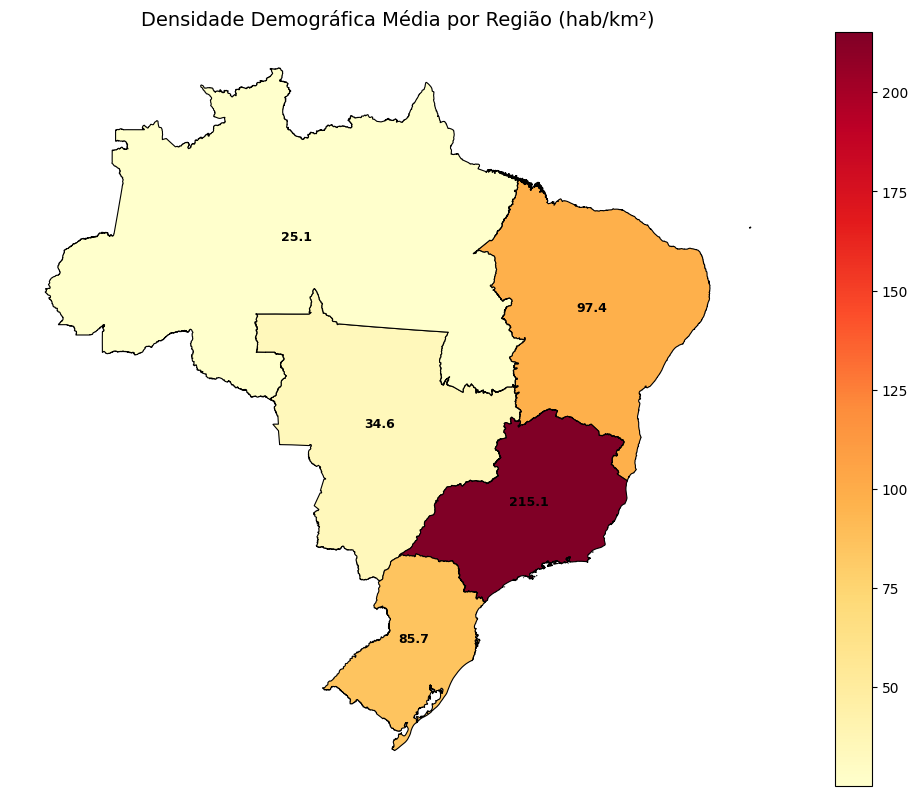

In [ ]:
povoamento_por_regiao = df_br.groupby('Regiao')['povoamento'].mean().reset_index()
estados = gpd.read_file('https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson')

regioes = {
    'Norte': ['Acre', 'Amapá', 'Amazonas', 'Pará', 'Rondônia', 'Roraima', 'Tocantins'],
    'Nordeste': ['Alagoas', 'Bahia', 'Ceará', 'Maranhão', 'Paraíba', 'Pernambuco', 'Piauí', 'Rio Grande do Norte', 'Sergipe'],
    'Centro-Oeste': ['Distrito Federal', 'Goiás', 'Mato Grosso', 'Mato Grosso do Sul'],
    'Sudeste': ['Espírito Santo', 'Minas Gerais', 'Rio de Janeiro', 'São Paulo'],
    'Sul': ['Paraná', 'Rio Grande do Sul', 'Santa Catarina']
}

def estado_para_regiao(nome_estado):
    for regiao, lista_estados in regioes.items():
        if nome_estado in lista_estados:
            return regiao
    return None

estados['Regiao'] = estados['name'].apply(estado_para_regiao)

regioes_geo = estados.dissolve(by='Regiao', as_index=False)

regioes_geo = regioes_geo.merge(povoamento_por_regiao, on='Regiao')

fig, ax = plt.subplots(figsize=(10, 8))
regioes_geo.plot(column='povoamento', cmap='YlOrRd', edgecolor='black', linewidth=0.8, legend=True, ax=ax)

for idx, row in regioes_geo.iterrows():
    plt.annotate(
        text=f"{row['povoamento']:.1f}",
        xy=row['geometry'].centroid.coords[0],
        ha='center',
        fontsize=9,
        weight='bold'
    )

plt.title('Densidade Demográfica Média por Região (hab/km²)', fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

###2. População vs QtEmpresas (por ano)
<p> Evidencia a quantidade populacional e a quantidade das empresas de cada município de cada região com o passar dos anos (2016 - 2021).
<p> É possível notar a sutil diferença entre cada um dos anos, indicando que mesmo que pouco, as regiões apresentaram um comportamento diferente nesse quesito.

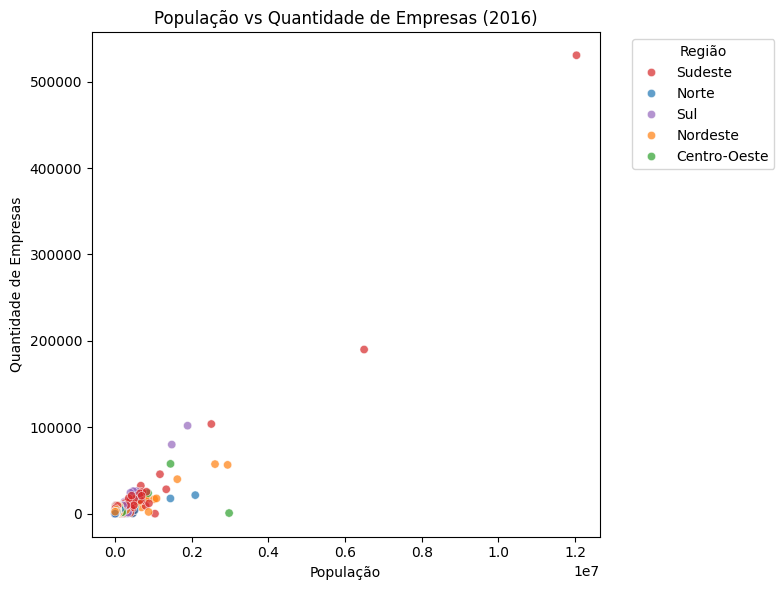

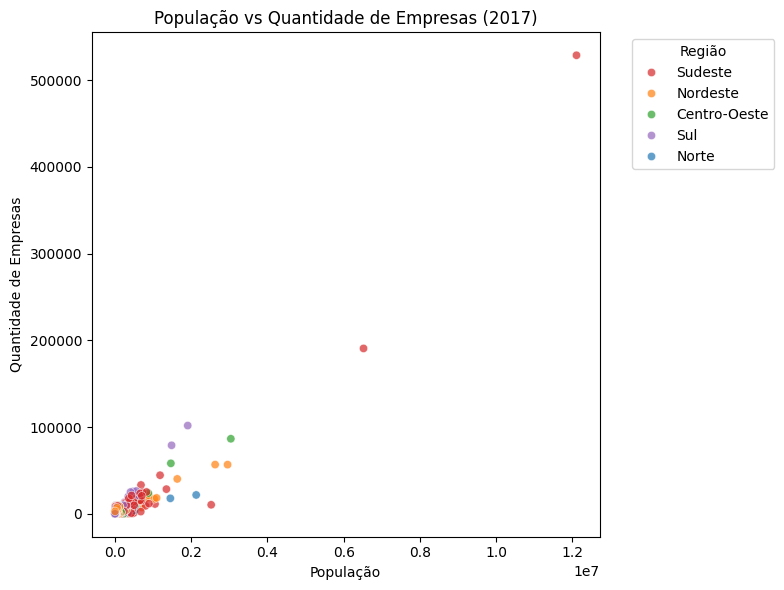

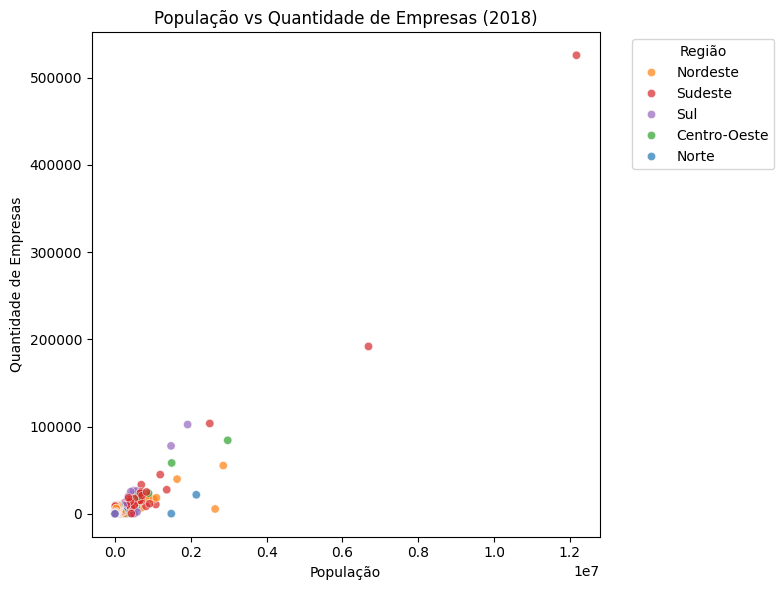

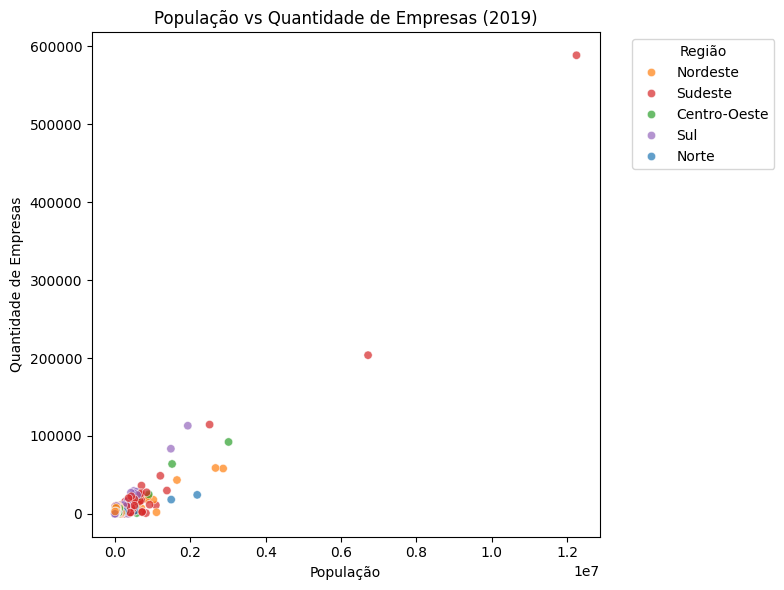

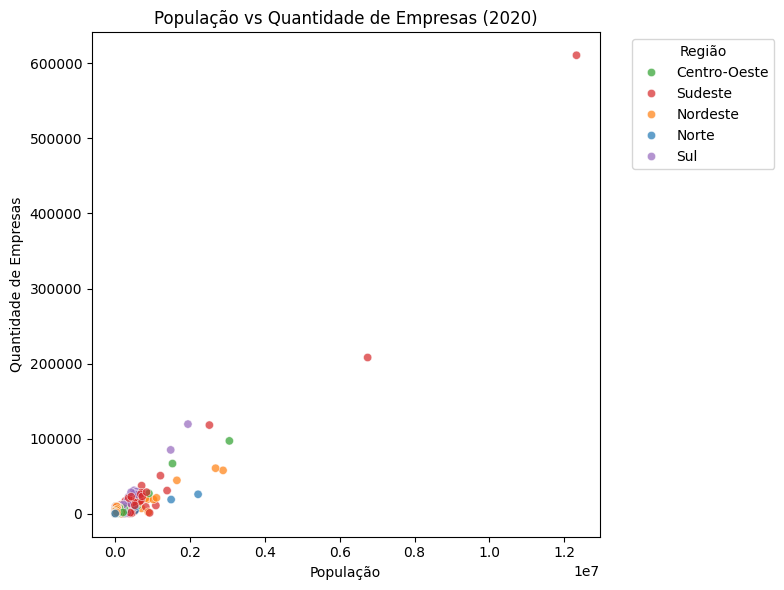

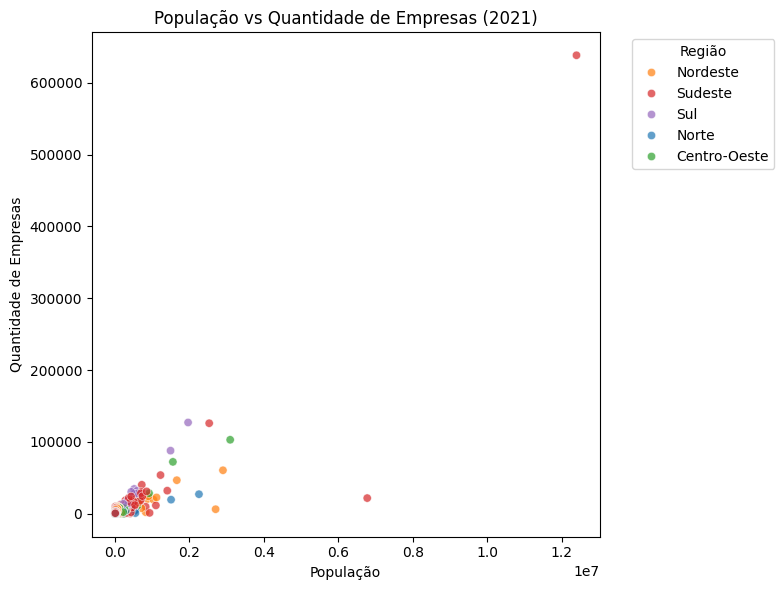

In [ ]:
palette_regioes = {
    'Norte': '#1f77b4',       # azul
    'Nordeste': '#ff7f0e',    # laranja
    'Centro-Oeste': '#2ca02c',# verde
    'Sudeste': '#d62728',     # vermelho
    'Sul': '#9467bd'          # roxo
}
anos = sorted(df_br['Ano'].unique())
for ano in anos:
    plt.figure(figsize=(8, 6))
    df_ano = df_br[df_br['Ano'] == ano]
    sns.scatterplot(
        data=df_ano,
        x='Populacao',
        y='QtEmpresas',
        hue='Regiao',
        palette=palette_regioes,
        alpha=0.7
    )
    plt.title(f'População vs Quantidade de Empresas ({ano})')
    plt.xlabel('População')
    plt.ylabel('Quantidade de Empresas')
    plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

###3. PIB médio por Região ao longo dos anos
<p> Relaciona a média do PIB das cinco regiões brasileiras ao longo dos anos (2016 - 2020)

Não há valores para o PIB de 2021, então removemos o ano do gráfico.

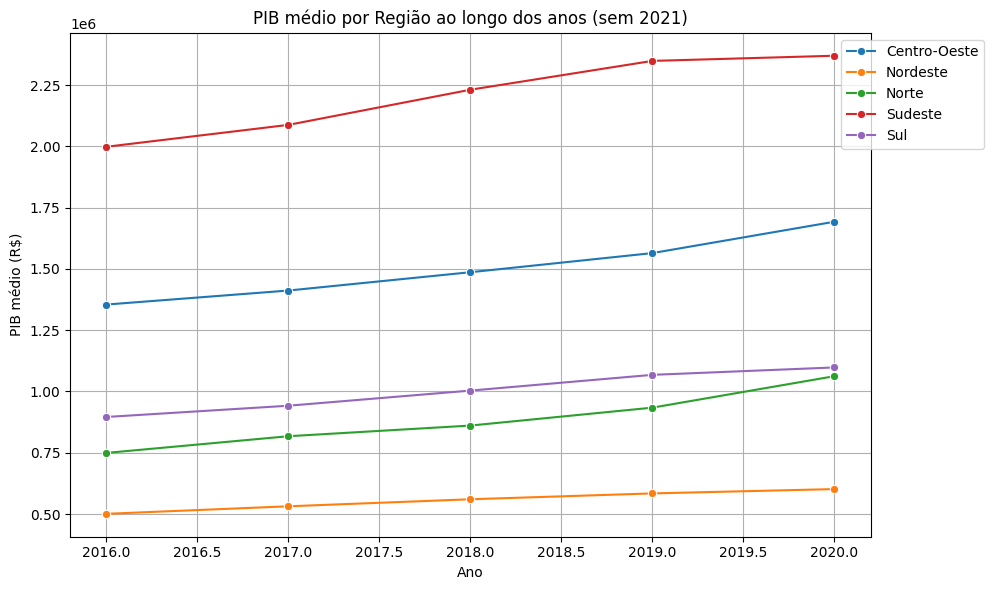

In [ ]:
plt.figure(figsize=(10,6))
pib_por_regiao = df_br.groupby(['Ano', 'Regiao'])['PIB'].mean().reset_index()
pib_por_regiao = pib_por_regiao[pib_por_regiao['Ano'] != 2021]
sns.lineplot(data=pib_por_regiao, x='Ano', y='PIB', hue='Regiao', marker='o')
plt.title('PIB médio por Região ao longo dos anos (sem 2021)')
plt.ylabel('PIB médio (R$)')
plt.xlabel('Ano')
plt.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.0))
plt.tight_layout()
plt.show()

###4. Relação entre Salários e Pessoal Assalariado
<p> Para todos os municípios de todas regiões, relaciona a quantidade de pessoas assalariadas com o valor dos salários oferecidos.
<p> É possível notar a sutil diferença entre cada um dos anos, indicando que mesmo que pouco, as regiões apresentaram um comportamento diferente nesse quesito.

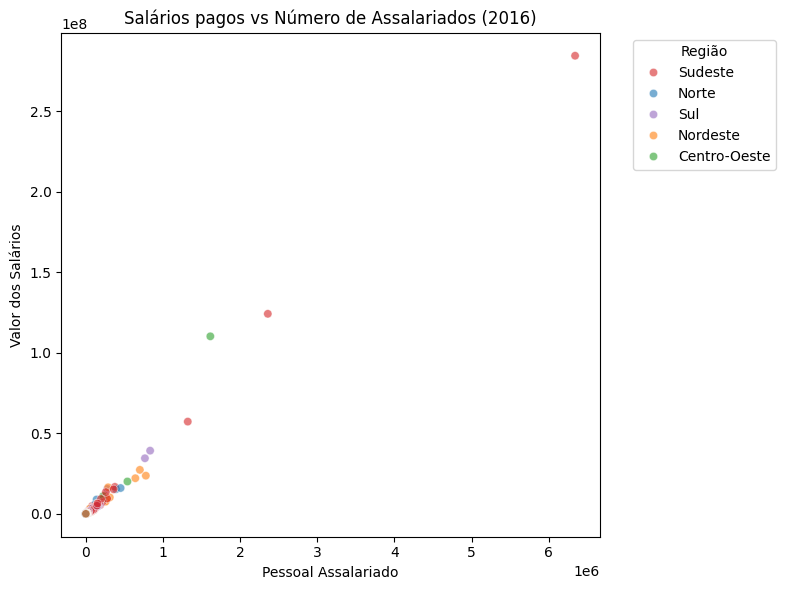

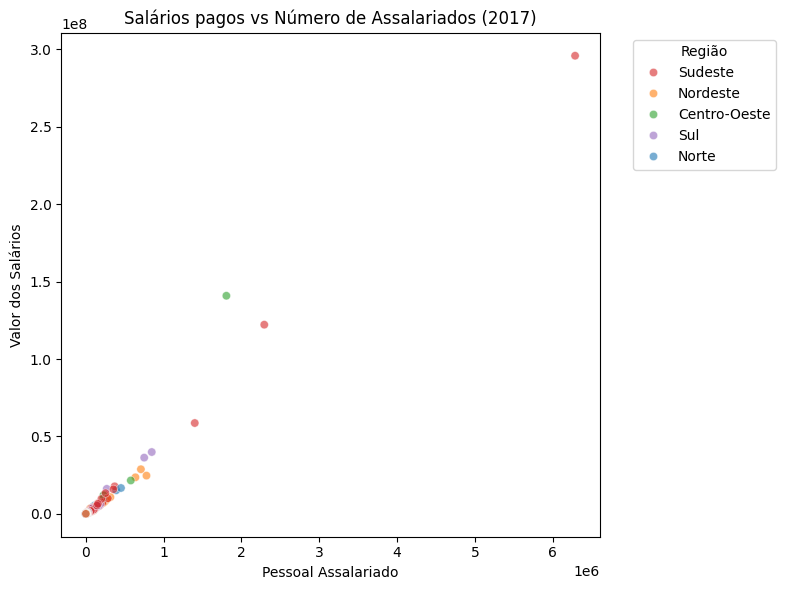

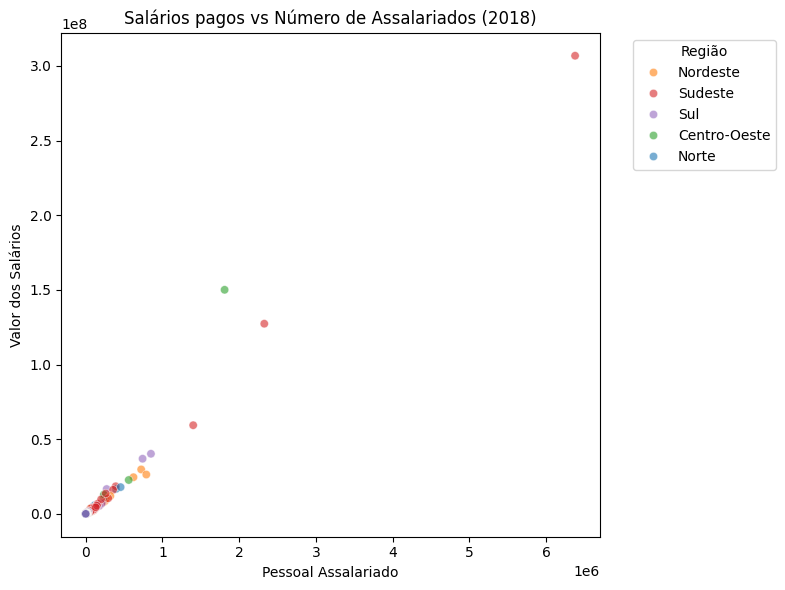

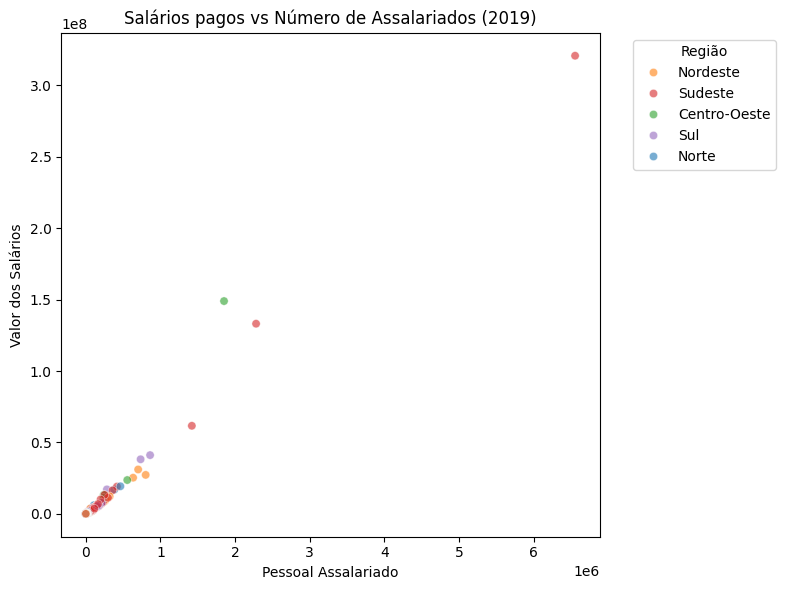

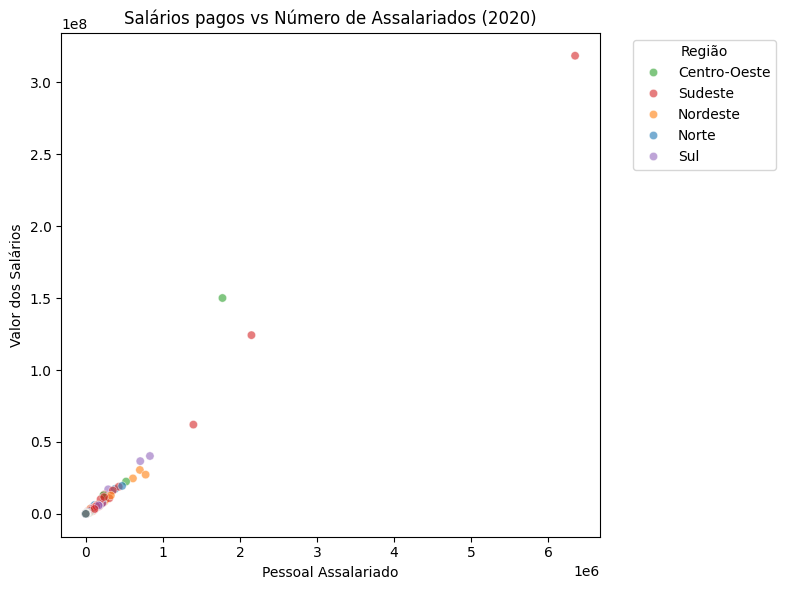

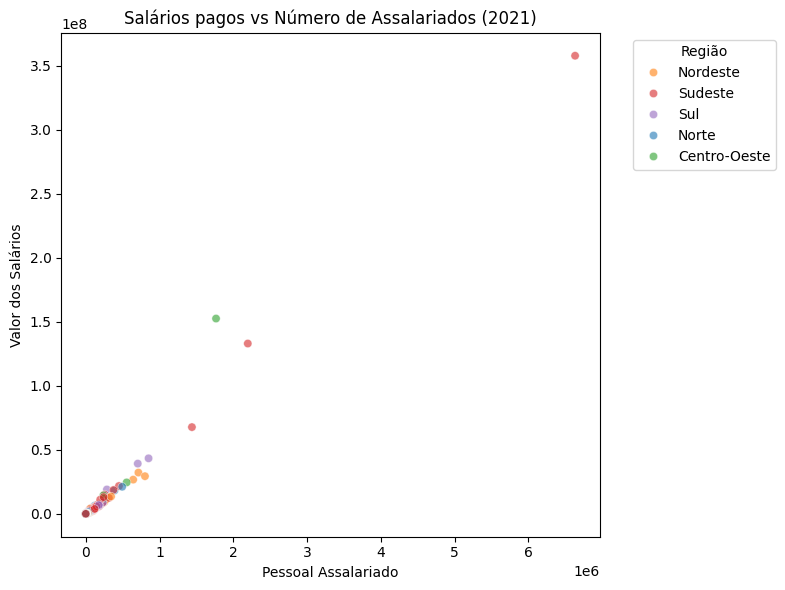

In [ ]:
palette_regioes = {
    'Norte': '#1f77b4',       # azul
    'Nordeste': '#ff7f0e',    # laranja
    'Centro-Oeste': '#2ca02c',# verde
    'Sudeste': '#d62728',     # vermelho
    'Sul': '#9467bd'          # roxo
}
anos = sorted(df_br['Ano'].unique())
for ano in anos:
    plt.figure(figsize=(8, 6))
    df_ano = df_br[df_br['Ano'] == ano]
    sns.scatterplot(
        data=df_ano,
        x='PessoalAssalariado',
        y='VrSalarios',
        hue='Regiao',
        palette=palette_regioes,
        alpha=0.6
    )
    plt.title(f'Salários pagos vs Número de Assalariados ({ano})')
    plt.xlabel('Pessoal Assalariado')
    plt.ylabel('Valor dos Salários')
    plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

 ### 5. Área Plantada vs. Área Colhida
 <p> Relaciona o total de área plantada com o total de área colhida de cada município de cada região.
 <p> É possível notar a sutil diferença entre cada um dos anos, indicando que mesmo que pouco, as regiões apresentaram um comportamento diferente nesse quesito.

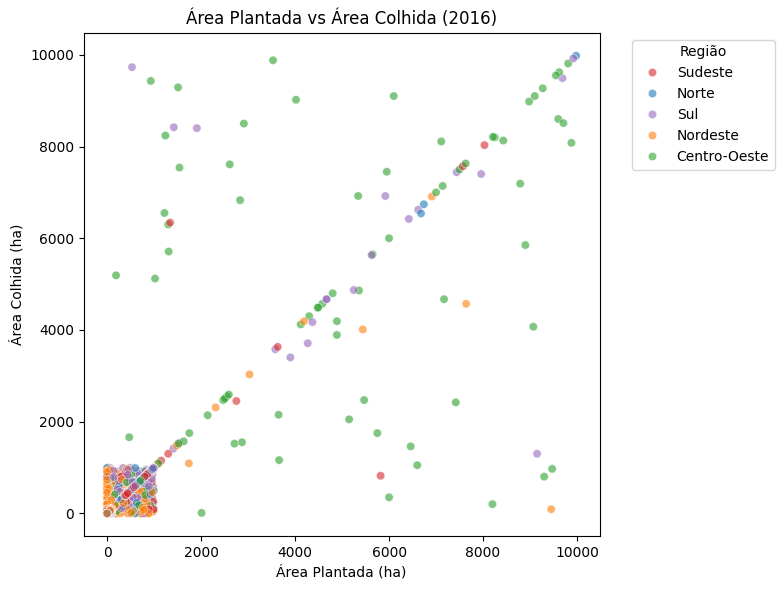

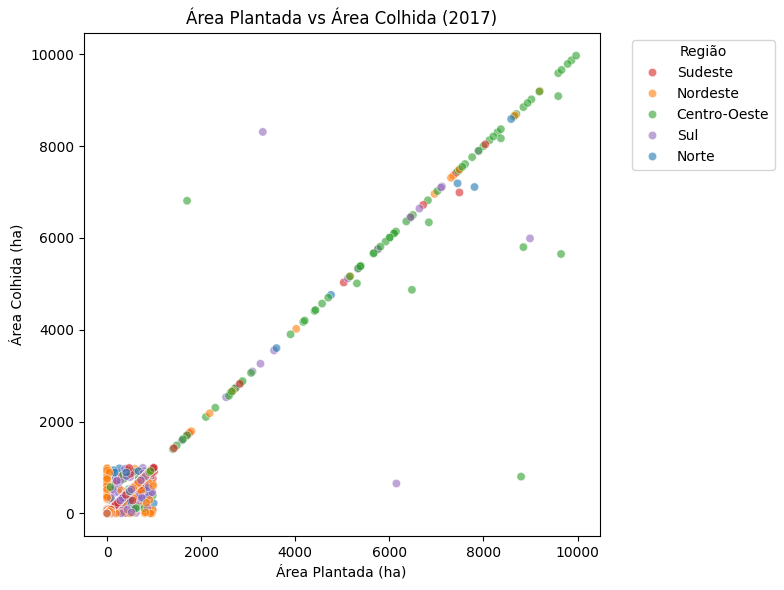

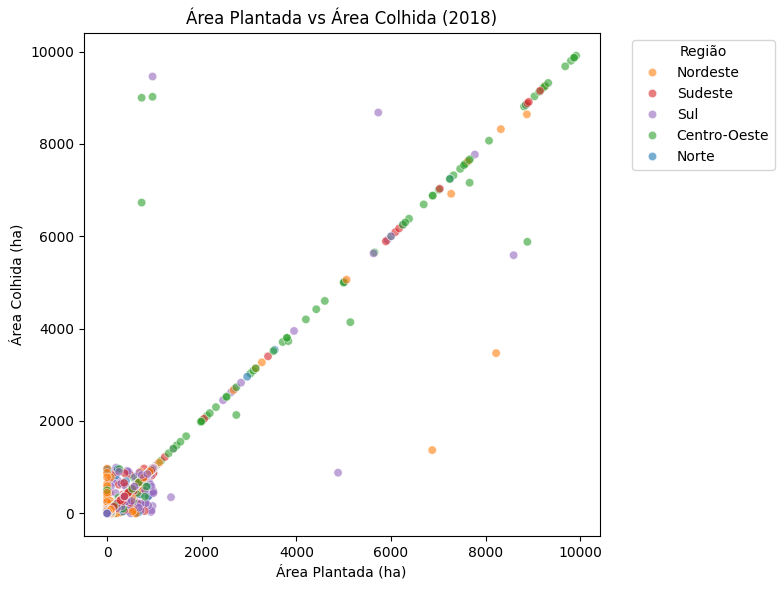

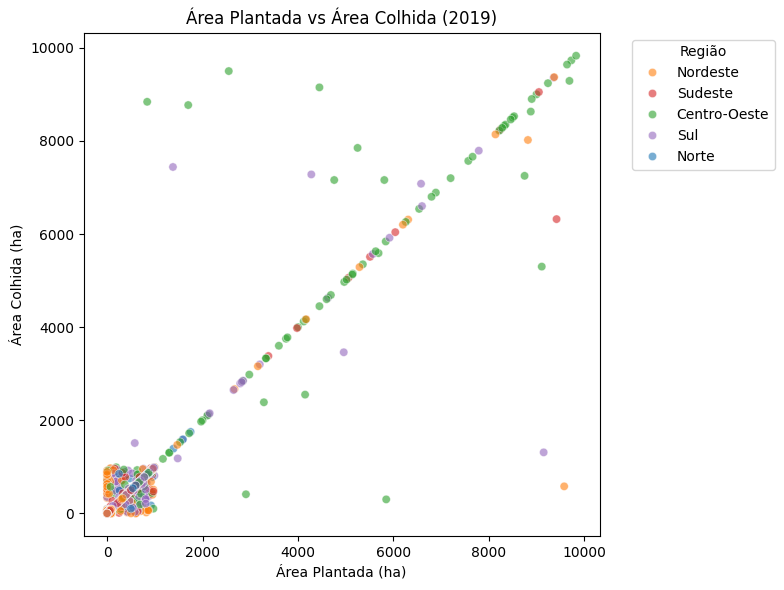

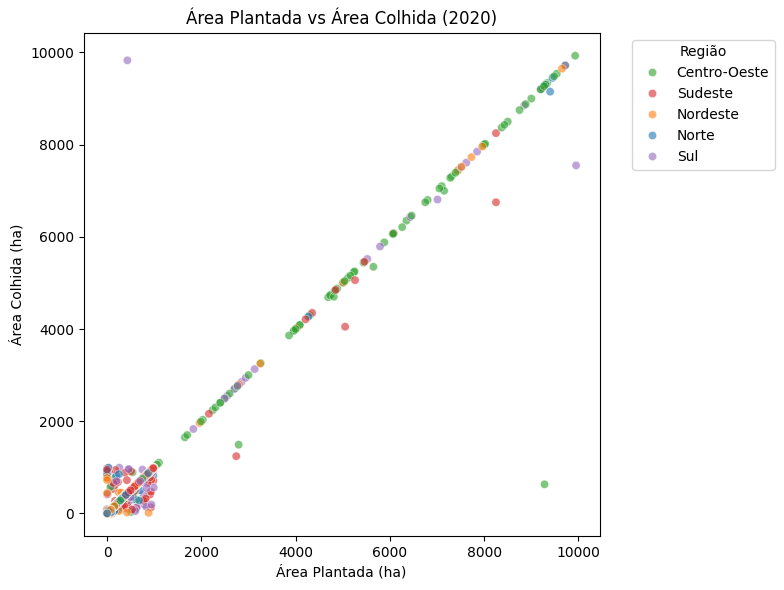

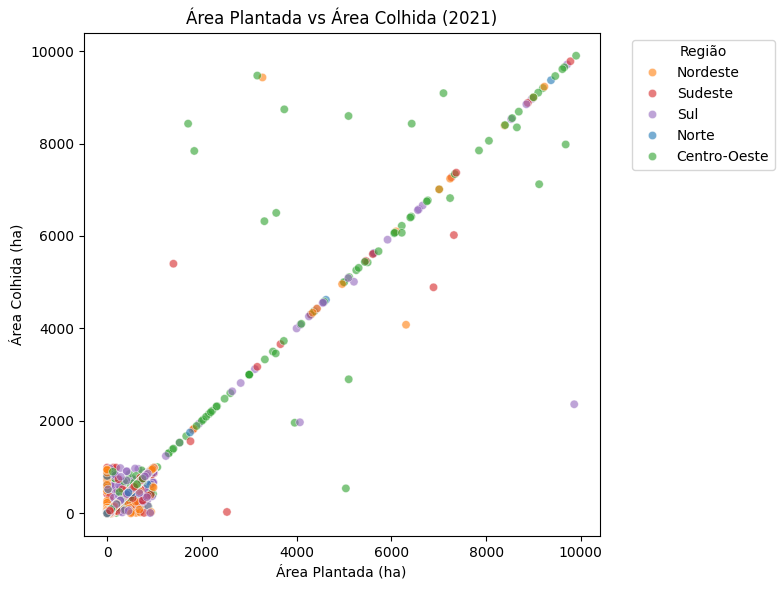

In [ ]:
palette_regioes = {
    'Norte': '#1f77b4',       # azul
    'Nordeste': '#ff7f0e',    # laranja
    'Centro-Oeste': '#2ca02c',# verde
    'Sudeste': '#d62728',     # vermelho
    'Sul': '#9467bd'          # roxo
}
anos = sorted(df_br['Ano'].unique())
for ano in anos:
    plt.figure(figsize=(8, 6))
    df_ano = df_br[df_br['Ano'] == ano]
    sns.scatterplot(
        data=df_ano,
        x='AreaPlantada_h',
        y='AreaColhida_h',
        hue='Regiao',
        palette=palette_regioes,
        alpha=0.6
    )
    plt.title(f'Área Plantada vs Área Colhida ({ano})')
    plt.xlabel('Área Plantada (ha)')
    plt.ylabel('Área Colhida (ha)')
    plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

###6. Produção Agrícola vs. Pecuária
<p> Faz um comparativo entre a produção agrícola e a produção pecuária para todos os municípios de todas as regiões.
<p> É possível notar a sutil diferença entre cada um dos anos, indicando que mesmo que pouco, as regiões apresentaram um comportamento diferente nesse quesito.

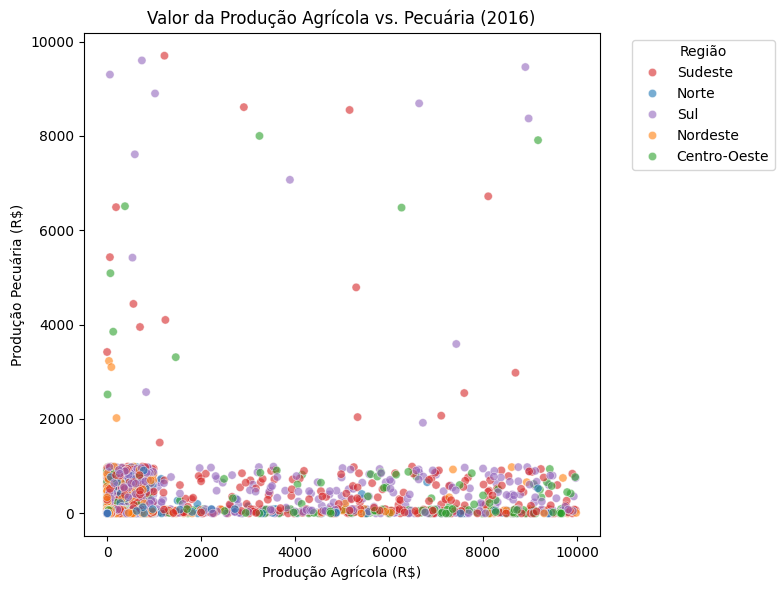

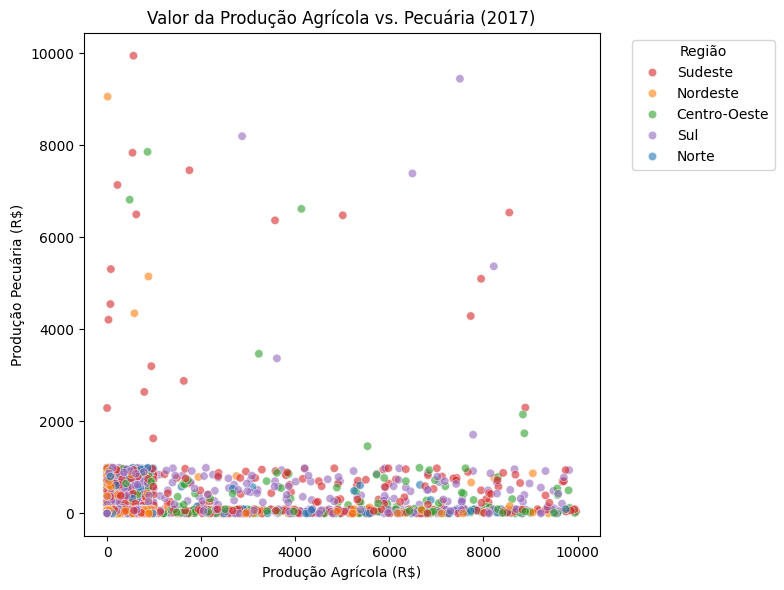

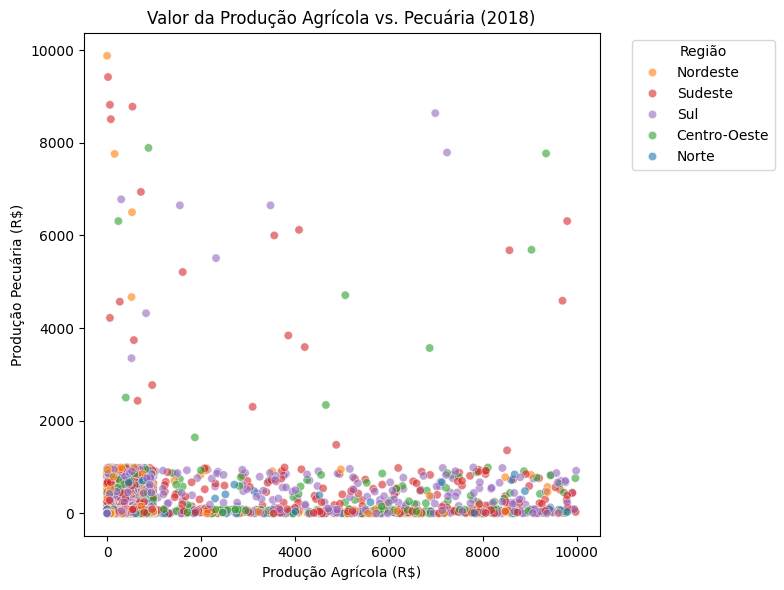

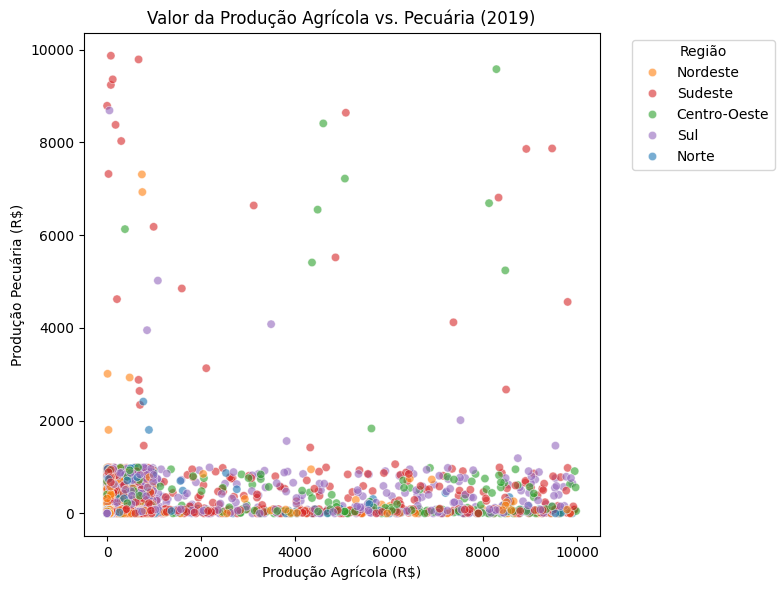

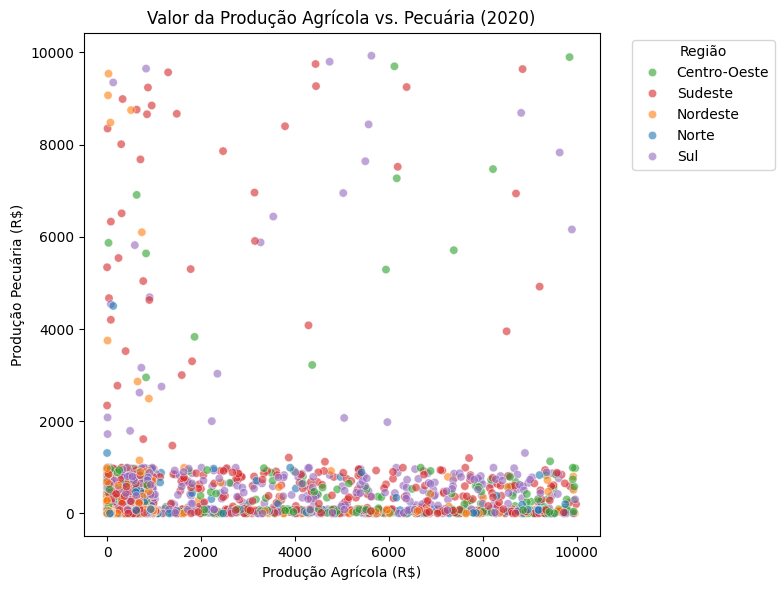

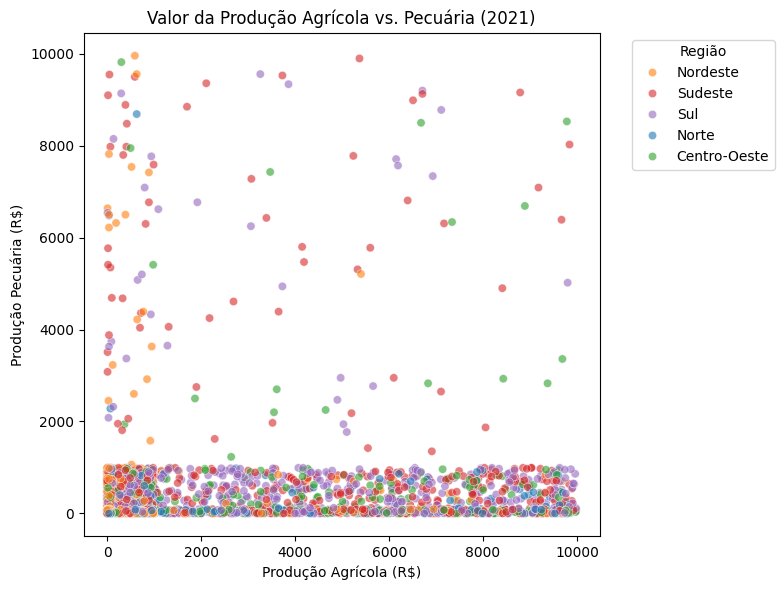

In [ ]:
palette_regioes = {
    'Norte': '#1f77b4',       # azul
    'Nordeste': '#ff7f0e',    # laranja
    'Centro-Oeste': '#2ca02c',# verde
    'Sudeste': '#d62728',     # vermelho
    'Sul': '#9467bd'          # roxo
}
anos = sorted(df_br['Ano'].unique())
for ano in anos:
    plt.figure(figsize=(8, 6))
    df_ano = df_br[df_br['Ano'] == ano]
    sns.scatterplot(
        data=df_ano,
        x='VlProducaoAgricola',
        y='VlProducaoPecuaria',
        hue='Regiao',
        palette=palette_regioes,
        alpha=0.6
    )
    plt.title(f'Valor da Produção Agrícola vs. Pecuária ({ano})')
    plt.xlabel('Produção Agrícola (R$)')
    plt.ylabel('Produção Pecuária (R$)')
    plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

###7. Exportações e Importações por Região (média anual)
<p> Faz uma média das importações e importações anuais para cada uma das cinco regiões do país.

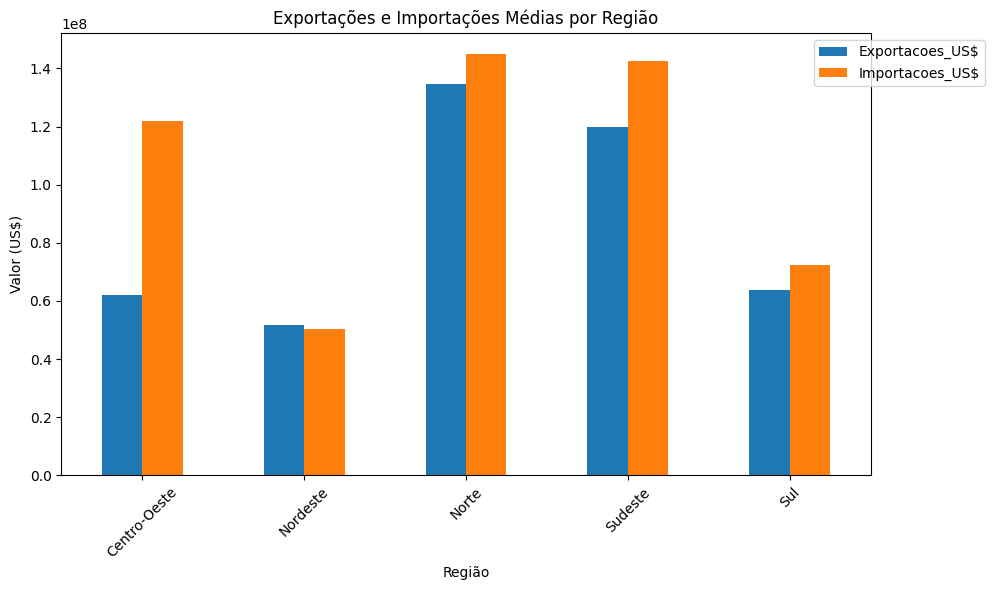

In [ ]:
exp_imp = df_br.groupby('Regiao')[['Exportacoes_US$', 'Importacoes_US$']].mean().reset_index()
exp_imp.plot(x='Regiao', kind='bar', figsize=(10,6))
plt.title('Exportações e Importações Médias por Região')
plt.ylabel('Valor (US$)')
plt.xlabel('Região')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.0))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###8. Nascimentos vs. Óbitos Infantis
<p> Relaciona a quantidade de nascimentos com a mortalidade infantil de cada município de cada região.
<p> É possível notar a sutil diferença entre cada um dos anos, indicando que mesmo que pouco, as regiões apresentaram um comportamento diferente nesse quesito.

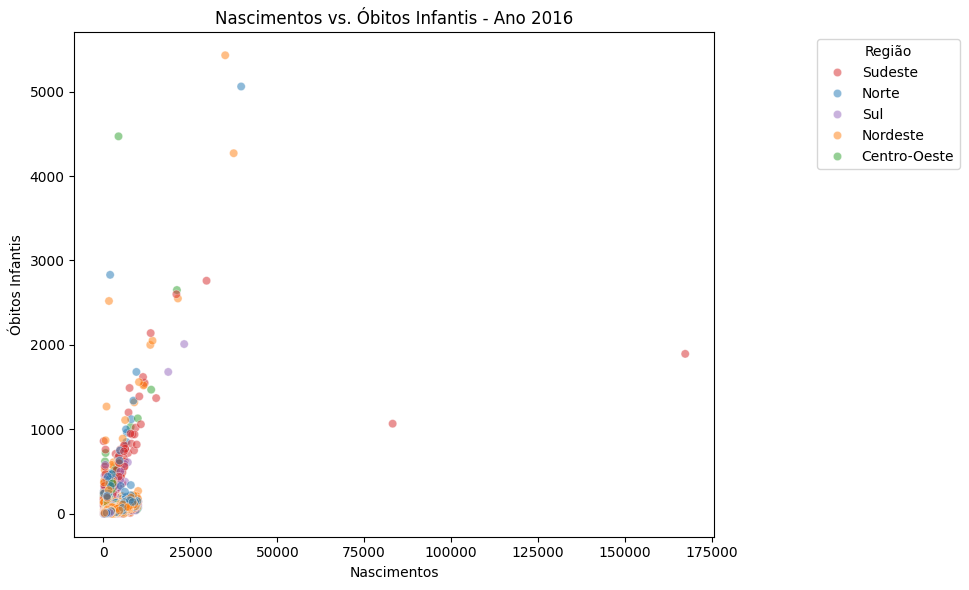

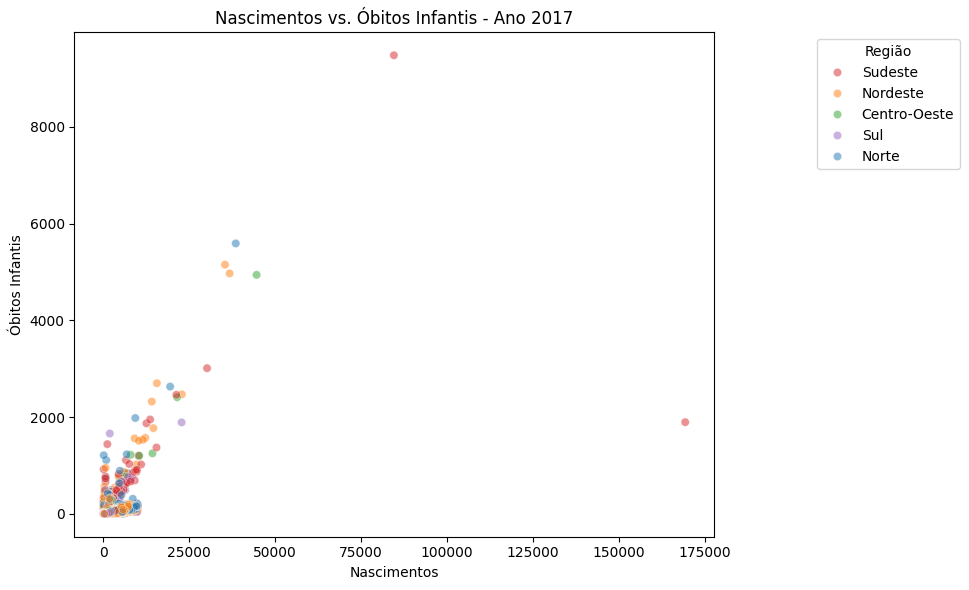

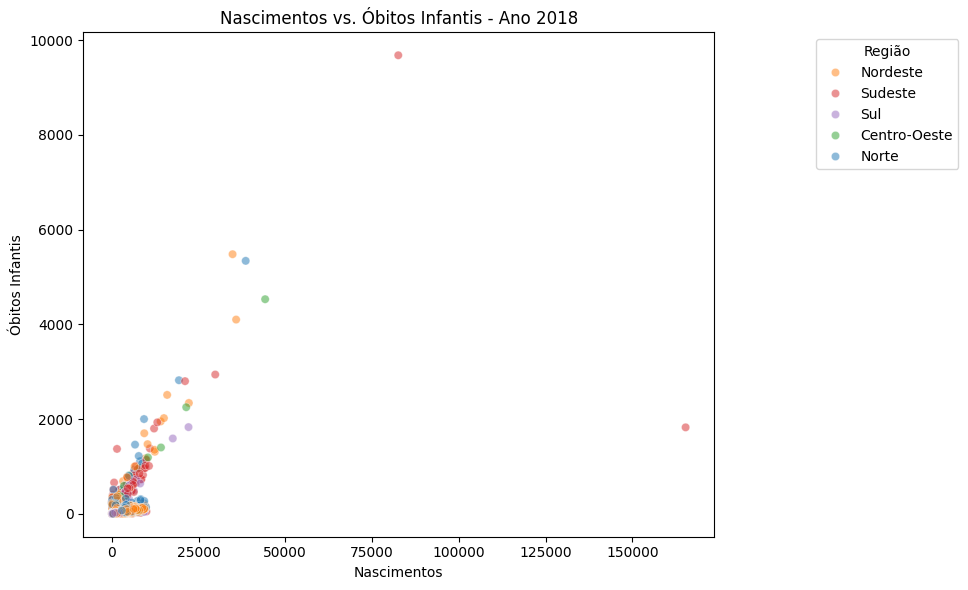

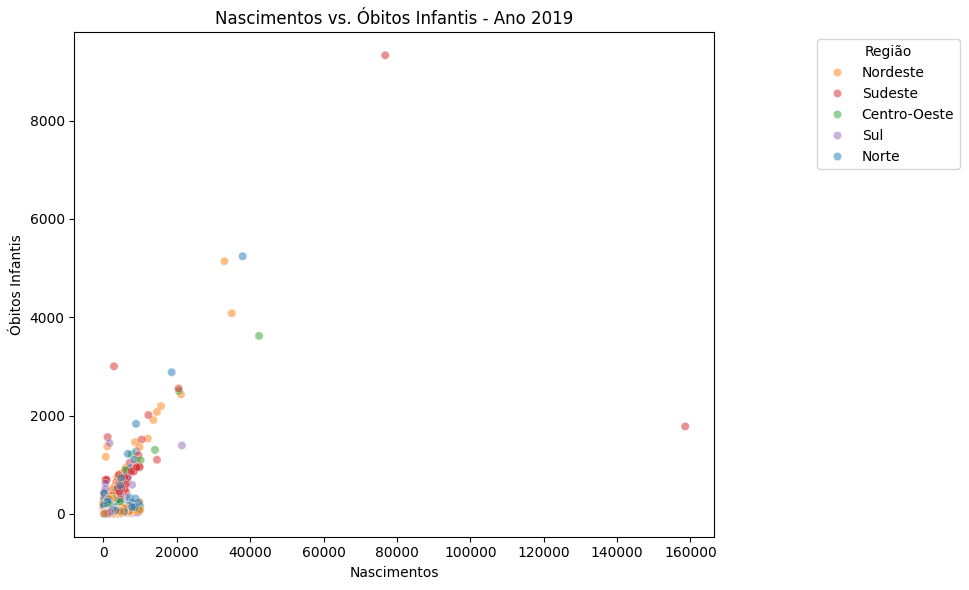

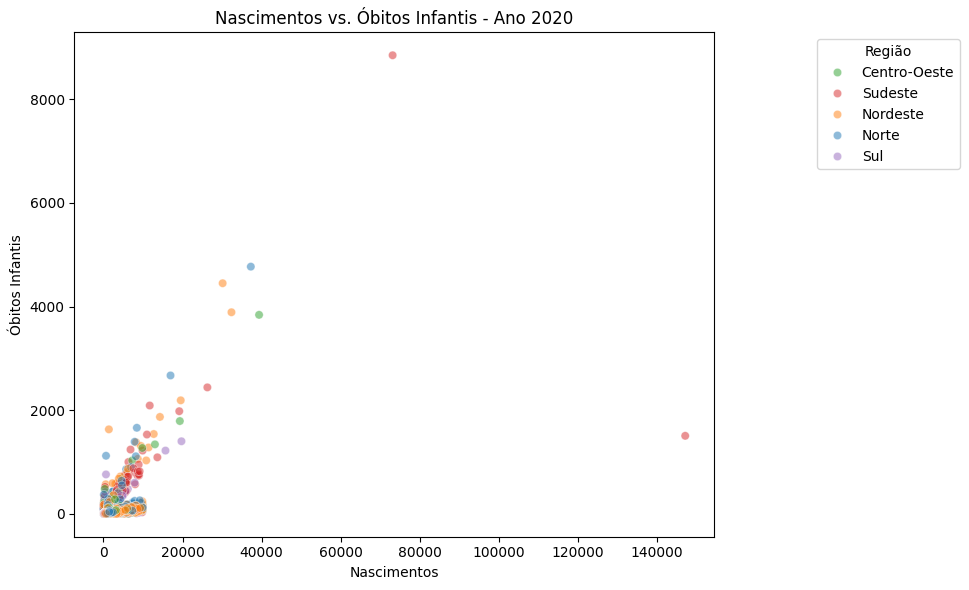

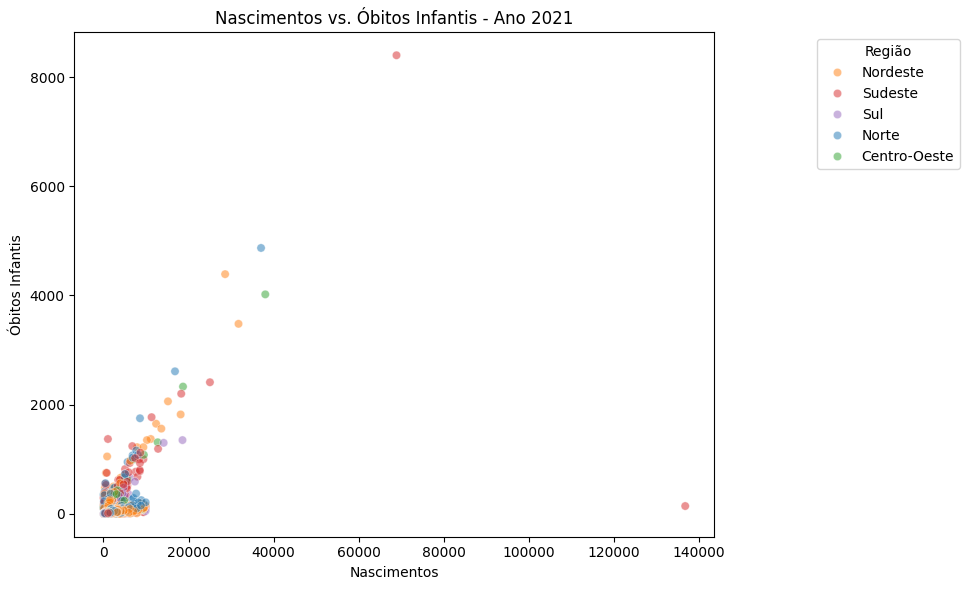

In [ ]:
palette_regioes = {
    'Norte': '#1f77b4',       # azul
    'Nordeste': '#ff7f0e',    # laranja
    'Centro-Oeste': '#2ca02c',# verde
    'Sudeste': '#d62728',     # vermelho
    'Sul': '#9467bd'          # roxo
}
anos = sorted(df_br['Ano'].unique())
for ano in anos:
    df_ano = df_br[df_br['Ano'] == ano]
    plt.figure(figsize=(10,6))
    sns.scatterplot(
        data=df_ano,
        x='NrNascimentos',
        y='NrObitosInfantis',
        hue='Regiao',
        palette=palette_regioes,
        alpha=0.5
    )
    plt.title(f'Nascimentos vs. Óbitos Infantis - Ano {ano}')
    plt.xlabel('Nascimentos')
    plt.ylabel('Óbitos Infantis')
    plt.legend(title='Região', bbox_to_anchor=(1.15, 1.0), loc='upper left')
    plt.tight_layout()
    plt.show()

##Dados relacionados à pandemia do Covid-19 - BrStats

###1. Queda no número de empresas
Objetivo: Ver se houve redução no número de empresas ativas.

Gráfico de linha com o eixo X sendo o ano e Y sendo a QtEmpresas.

Uma linha para cada região.

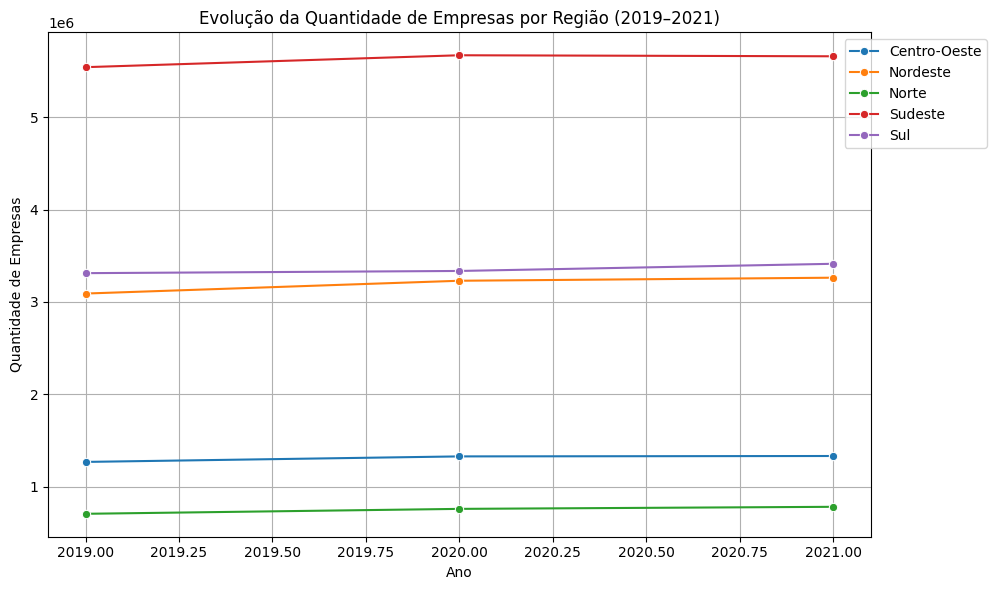

In [36]:
df_emp = df_br[df_br['Ano'].between(2019, 2021)]
df_group = df_emp.groupby(['Ano', 'Regiao'])['QtEmpresas'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_group, x='Ano', y='QtEmpresas', hue='Regiao', marker='o')
plt.title('Evolução da Quantidade de Empresas por Região (2019–2021)')
plt.ylabel('Quantidade de Empresas')
plt.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.0))
plt.tight_layout()
plt.show()

###2. PIB por região ao longo dos anos
Objetivo: Analisar o impacto direto no Produto Interno Bruto.

Gráfico de linha do PIB por região, 2019–2020.

Não há valores para o PIB no ano de 2021, então removemos o ano do gráfico.


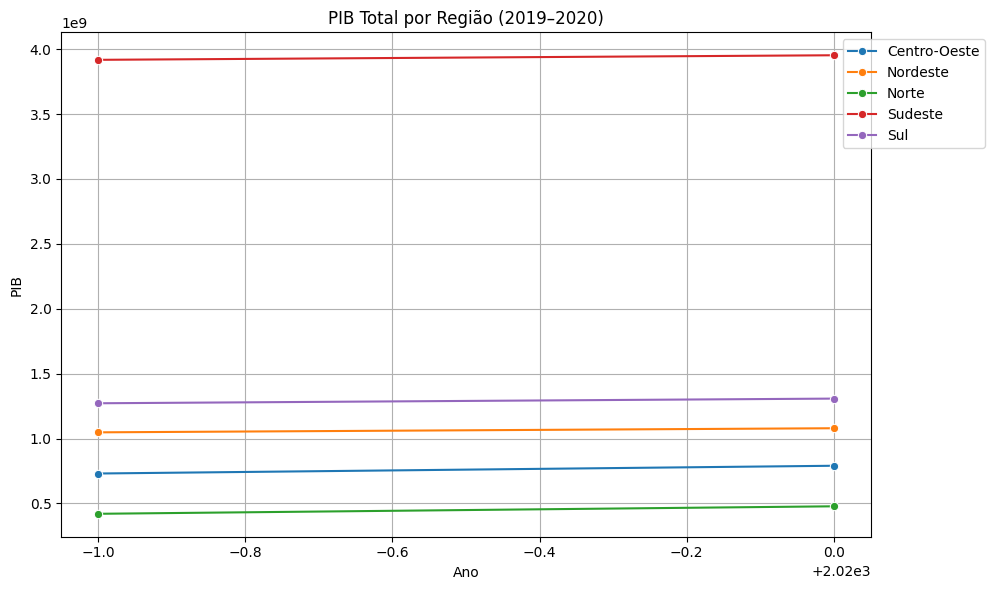

In [37]:
df_pib = df_br[df_br['Ano'].between(2019, 2021)]
df_group = df_pib.groupby(['Ano', 'Regiao'])['PIB'].sum().reset_index()
df_group = df_group[df_group['Ano'] != 2021]
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_group, x='Ano', y='PIB', hue='Regiao', marker='o')
plt.title('PIB Total por Região (2019–2020)')
plt.ylabel('PIB')
plt.xlabel('Ano')
plt.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.0))
plt.tight_layout()
plt.show()

###3. Impacto no emprego
Objetivo: Ver efeitos no mercado de trabalho.

Gráfico de barras para:

*   PessoalOcupado
*   PessoalAssalariado

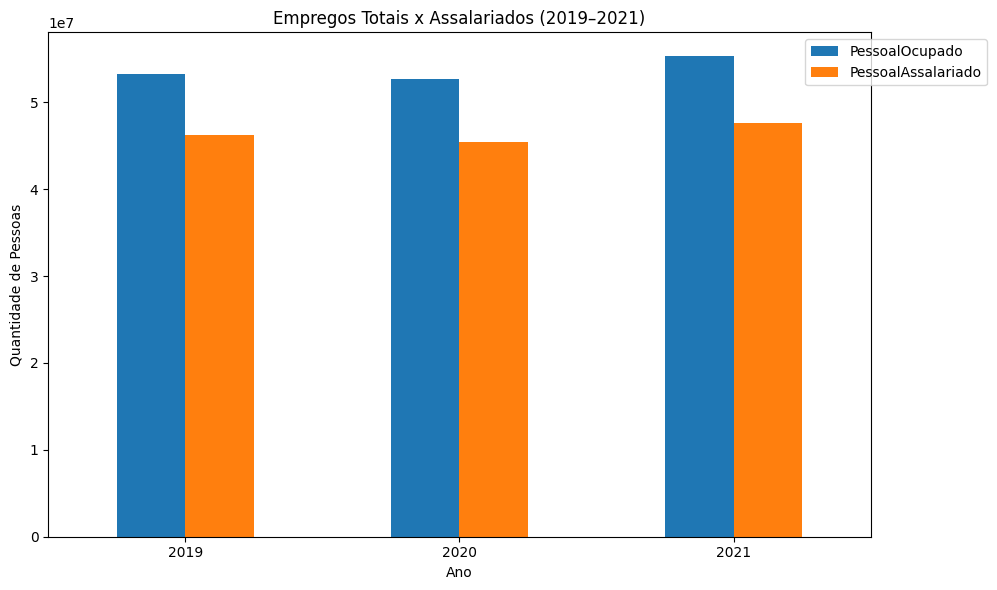

In [44]:
df_job = df_br[df_br['Ano'].between(2019, 2021)]
df_group = df_job.groupby('Ano')[['PessoalOcupado', 'PessoalAssalariado']].sum().reset_index()
df_group.plot(x='Ano', kind='bar', figsize=(10, 6))
plt.title('Empregos Totais x Assalariados (2019–2021)')
plt.ylabel('Quantidade de Pessoas')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.0))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

###4. Nascimentos e Óbitos Infantis
Objetivo: Investigar impacto demográfico e no sistema de saúde.

Gráfico de linha para NrNascimentos e NrObitosInfantis por ano e região.

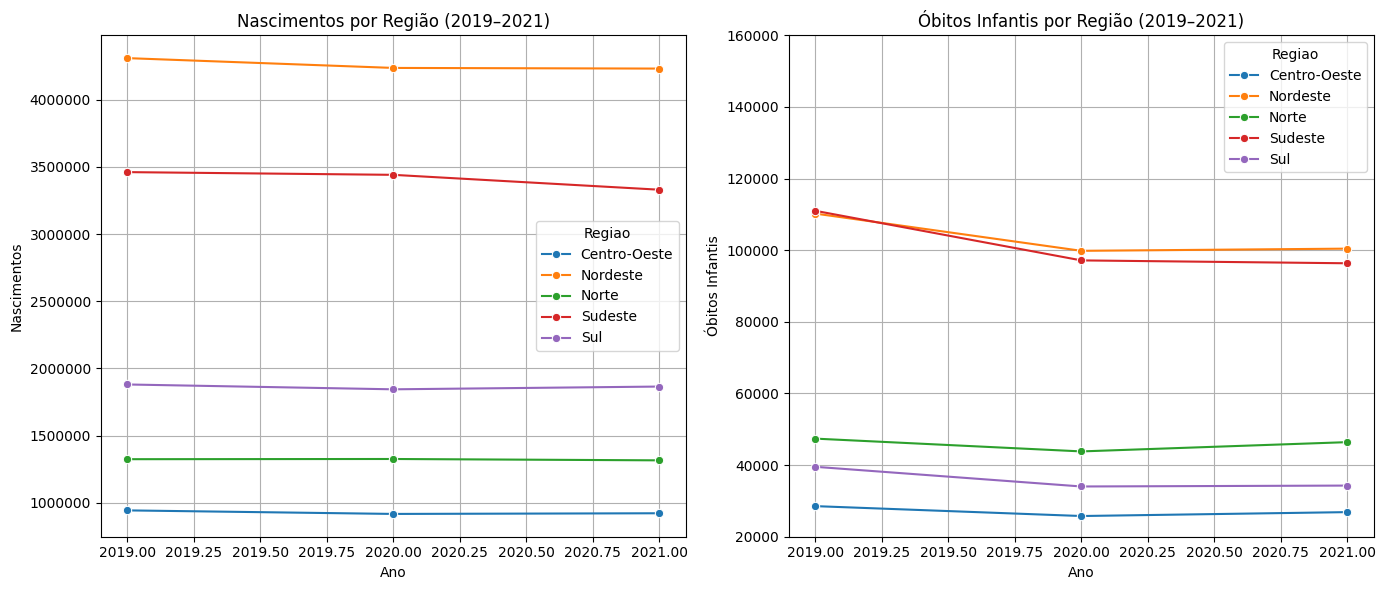

In [43]:
from matplotlib.ticker import FuncFormatter
def normal_notation(x, pos):
    return f'{x:.0f}'
df_nasc = df_br[df_br['Ano'].between(2019, 2021)]
df_group = df_nasc.groupby(['Ano', 'Regiao'])[['NrNascimentos', 'NrObitosInfantis']].sum().reset_index()
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.lineplot(data=df_group, x='Ano', y='NrNascimentos', hue='Regiao', marker='o')
plt.title('Nascimentos por Região (2019–2021)')
plt.ylabel('Nascimentos')
plt.xlabel('Ano')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(FuncFormatter(normal_notation))
plt.subplot(1, 2, 2)
sns.lineplot(data=df_group, x='Ano', y='NrObitosInfantis', hue='Regiao', marker='o')
plt.title('Óbitos Infantis por Região (2019–2021)')
plt.ylabel('Óbitos Infantis')
plt.xlabel('Ano')
plt.grid(True)
plt.ylim(20000, 160000)
plt.gca().yaxis.set_major_formatter(FuncFormatter(normal_notation))
plt.tight_layout()
plt.show()

###5. Scatterplots comparando antes e depois de PIB vs QtEmpresas para 2019 vs 2020
Objetivo: Avaliar mudanças em relações econômicas para todos os municípios de todas as regiões.
<p> É possível notar a sutil diferença entre cada um dos anos, indicando que mesmo que pouco, as regiões apresentaram um comportamento diferente nesse quesito.

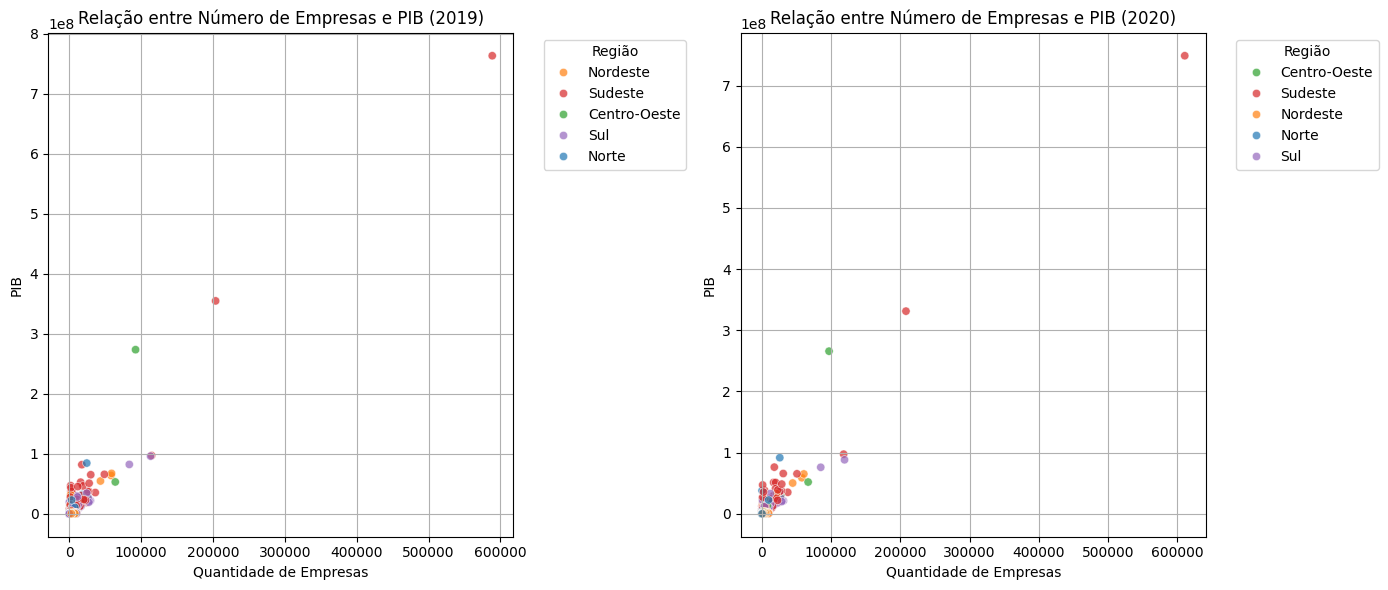

In [42]:
palette_regioes = {
    'Norte': '#1f77b4',       # azul
    'Nordeste': '#ff7f0e',    # laranja
    'Centro-Oeste': '#2ca02c',# verde
    'Sudeste': '#d62728',     # vermelho
    'Sul': '#9467bd'          # roxo
}
df_filtered = df_br[df_br['Ano'].isin([2019, 2020])]

plt.figure(figsize=(14, 6))

# Gráfico para 2019
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_filtered[df_filtered['Ano'] == 2019], x='QtEmpresas', y='PIB', hue='Regiao',
                palette=palette_regioes, alpha=0.7)
plt.title('Relação entre Número de Empresas e PIB (2019)')
plt.xlabel('Quantidade de Empresas')
plt.ylabel('PIB')
plt.grid(True)
plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')

# Gráfico para 2020
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_filtered[df_filtered['Ano'] == 2020], x='QtEmpresas', y='PIB', hue='Regiao',
                palette=palette_regioes, alpha=0.7)
plt.title('Relação entre Número de Empresas e PIB (2020)')
plt.xlabel('Quantidade de Empresas')
plt.ylabel('PIB')
plt.grid(True)
plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

###6. Boxplot da razão entre Receita e Transferência
Objetivo: Identificar autossuficiência fiscal antes e durante a pandemia.

Razão: Receitas_R$ / (Transferencias_correntes_R$ + Transferencias_capital_R$)

Boxplot por região, em 2019 vs 2020/2021

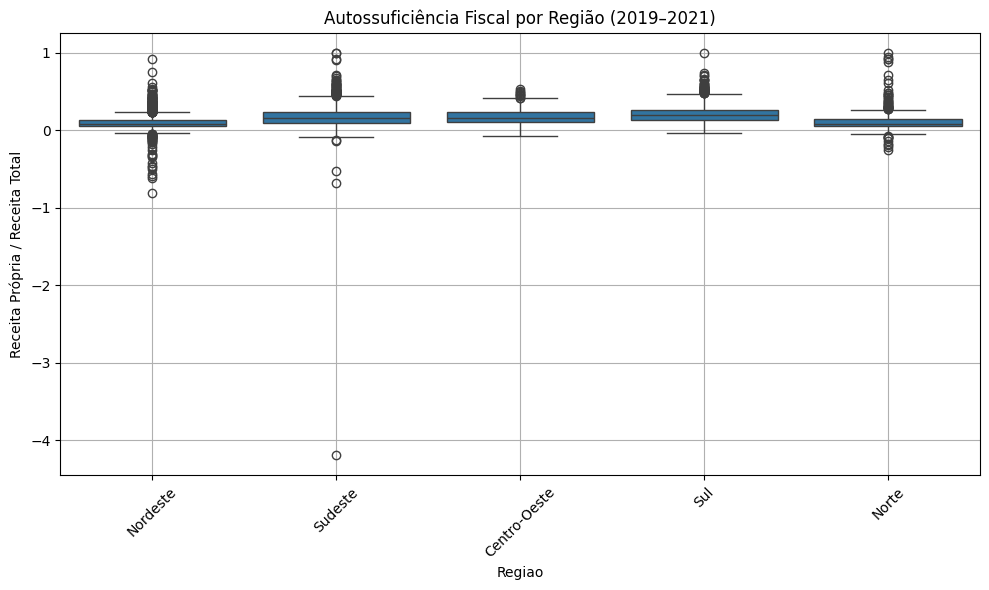

In [41]:
df_ratio = df_br.copy()
df_ratio['ReceitaPropria'] = df_ratio['Receitas_R$'] - df_ratio['Transferencias_correntes_R$'] - df_ratio['Transferencias_capital_R$']
df_ratio = df_ratio[df_ratio['Ano'].between(2019, 2021)]
df_ratio['Razao'] = df_ratio['ReceitaPropria'] / (df_ratio['Receitas_R$'] + 1)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_ratio, x='Regiao', y='Razao')
plt.title('Autossuficiência Fiscal por Região (2019–2021)')
plt.ylabel('Receita Própria / Receita Total')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Importação dos Dados sobre a COVID-19 - DataSUS


<p>Nessa subseção faremos a importação e também compreenção dos dados que obtivemos sobre a pandemia de COVID 19 que afetou o Brasil e o mundo entre 2020 e 2023.
<p>O primeiro caso da doença no Brasil foi registrada no dia 25 de Fevereiro de 2020, na cidade de São Paulo. Desde então, o Ministério da Saúde realizou o monitoramento diário do avanço da pandemia em terras tupiniquins.
<p>Utilizando por base o Ministério da Saúde, o Brasil.IO e o perfil @coronavirusbra1, este levantamento realizado pelo Departamento de Física da Universidade Federal de Viçosa, liderado pelo Professor Wesley Cota, apresenta dados desde a 9ª até a 311ª semana da pandemia no Brasil.
<p>A seguir faremos a importação desses dados, nomeados como 'casos_2020.csv', 'casos_2021.csv', 'casos_2022.csv' e 'casos_2023.csv'.

In [45]:
df_2020 = pd.read_csv('casos_2020.csv', low_memory=False)
print(f"Casos 2020: {df_2020.shape[0]} linhas, {df_2020.shape[1]} colunas")

Casos 2020: 1314380 linhas, 12 colunas


In [46]:
df_2021 = pd.read_csv('casos_2021.csv', low_memory=False)
print(f"Casos 2021: {df_2021.shape[0]} linhas, {df_2021.shape[1]} colunas")

Casos 2021: 2042733 linhas, 12 colunas


In [47]:
df_2022 = pd.read_csv('casos_2022.csv', low_memory=False)
print(f"Casos 2022: {df_2022.shape[0]} linhas, {df_2022.shape[1]} colunas")

Casos 2022: 2042905 linhas, 12 colunas


In [48]:
df_2023 = pd.read_csv('casos_2023.csv', low_memory=False)
print(f"Casos 2023: {df_2023.shape[0]} linhas, {df_2023.shape[1]} colunas")

Casos 2023: 430969 linhas, 12 colunas


### Descrição dos Dados - casos_2020 a 2023

Como é possível observar pela execução dos trechos de código que antecedem essa subseção, os códigos foram formatados como esperado, não necessitando uma conversão como para o DataSet anterior.

| Coluna                         | Descrição                                                                                                          |
|--------------------------------|--------------------------------------------------------------------------------------------------------------------|
| date                           | Data do registro, no formato YYYY-MM-DD.                                                                           |
| country                        | País dos dados, que é sempre "Brazil".                                                                             |
| state                          | Sigla da unidade federativa (UF) ou "TOTAL" quando se refere ao país inteiro.                                      |
| city                           | Nome completo do município no formato "Cidade/UF". Pode ser "CASO SEM LOCALIZACAO DEFINIDA/UF".                  |
| ibgeID                         | ID único do município fornecido pelo Instituto Brasileiro de Geografia e Estatística (IBGE).                      |
| newDeaths                      | Diferença entre o número de óbitos da data correspondente e o dia anterior.                                        |
| deaths                         | Número acumulado de óbitos até aquela data.                                                                        |
| newCases                       | Diferença entre o número de casos da data correspondente e o dia anterior.                                         |
| totalCases                     | Número acumulado de casos até aquela data.                                                                         |
| deaths_per_100k_inhabitants   | Número de óbitos por 100.000 habitantes naquela localidade.                                                        |
| totalCases_per_100k_inhabitants | Número de casos por 100.000 habitantes naquela localidade.                                                        |
| deaths_by_totalCases           | Proporção entre o número de óbitos e o número total de casos.                                                      |


####Resumo dos Dados


In [49]:
def gerar_resumo(df):
    desc_numericas = df.describe().T
    nulos = df.isnull().sum()
    tipos = df.dtypes
    valores_unicos = df.nunique()

    resumo = pd.DataFrame({
        'Tipo': tipos,
        'Nulos': nulos,
        'Valores únicos': valores_unicos,
        'Mínimo': desc_numericas['min'],
        'Máximo': desc_numericas['max'],
        'Média': desc_numericas['mean'],
        'Mediana': df.median(numeric_only=True)
    })

    resumo = resumo.fillna("-")
    return resumo

In [50]:
resumo_2020 = gerar_resumo(df_2020)
print(resumo_2020.to_markdown())

|                                 | Tipo    |   Nulos |   Valores únicos | Mínimo   | Máximo    | Média               | Mediana   |
|:--------------------------------|:--------|--------:|-----------------:|:---------|:----------|:--------------------|:----------|
| city                            | object  |       0 |             5596 | -        | -         | -                   | -         |
| date                            | object  |       0 |              311 | -        | -         | -                   | -         |
| deaths                          | int64   |       0 |             3102 | 0.0      | 195008.0  | 41.23855201692052   | 2.0       |
| deaths_by_totalCases            | float64 |       0 |              354 | 0.0      | 1.1       | 0.03249711042468694 | 0.016     |
| deaths_per_100k_inhabitants     | float64 |       0 |            56887 | 0.0      | 401.606   | 28.60326229553098   | 17.036    |
| epi_week                        | int64   |       0 |               45 | 9

In [51]:
resumo_2021 = gerar_resumo(df_2021)
print(resumo_2021.to_markdown())

|                                 | Tipo    |   Nulos |   Valores únicos | Mínimo    | Máximo     | Média                | Mediana   |
|:--------------------------------|:--------|--------:|-----------------:|:----------|:-----------|:---------------------|:----------|
| city                            | object  |       0 |             5597 | -         | -          | -                    | -         |
| date                            | object  |       0 |              365 | -         | -          | -                    | -         |
| deaths                          | int64   |       0 |             6570 | 0.0       | 619079.0   | 165.96128324161796   | 15.0      |
| deaths_by_totalCases            | float64 |       0 |              293 | 0.0       | 4.0        | 0.023338368254686253 | 0.02      |
| deaths_per_100k_inhabitants     | float64 |       0 |           128438 | 0.0       | 1739.13    | 161.91651551328536   | 139.424   |
| epi_week                        | int64   |       0 |

In [52]:
resumo_2022 = gerar_resumo(df_2022)
print(resumo_2022.to_markdown())

|                                 | Tipo    |   Nulos |   Valores únicos | Mínimo   | Máximo      | Média               | Mediana   |
|:--------------------------------|:--------|--------:|-----------------:|:---------|:------------|:--------------------|:----------|
| city                            | object  |       0 |             5597 | -        | -           | -                   | -         |
| date                            | object  |       0 |              365 | -        | -           | -                   | -         |
| deaths                          | int64   |       0 |             6571 | 0.0      | 693853.0    | 238.94806464324088  | 24.0      |
| deaths_by_totalCases            | float64 |       0 |              201 | 0.0      | 7.788       | 0.01869697465129314 | 0.016     |
| deaths_per_100k_inhabitants     | float64 |       0 |            45129 | 0.0      | 15608.136   | 244.42852886698105  | 224.581   |
| epi_week                        | int64   |       0 |       

In [53]:
resumo_2023 = gerar_resumo(df_2023)
print(resumo_2023.to_markdown())

|                                 | Tipo    |   Nulos |   Valores únicos | Mínimo    | Máximo      | Média                | Mediana   |
|:--------------------------------|:--------|--------:|-----------------:|:----------|:------------|:---------------------|:----------|
| city                            | object  |       0 |             5597 | -         | -           | -                    | -         |
| date                            | object  |       0 |               77 | -         | -           | -                    | -         |
| deaths                          | int64   |       0 |             1899 | -258.0    | 699310.0    | 249.17804760899276   | 25.0      |
| deaths_by_totalCases            | float64 |       0 |              124 | 0.0       | 0.312       | 0.01697525344050269  | 0.014     |
| deaths_per_100k_inhabitants     | float64 |       0 |             9957 | -0.695    | 31963.338   | 257.23543007965765   | 236.586   |
| epi_week                        | int64   |   

### Criação de Novos Conjuntos de Dados

<p>Visando ter apenas os valores totais da pandemia para cada ano, realizamos uma limpeza dos dados, criando novos conjuntos de dados com estes.
<p>Esses novos DataSets serão utilizados nas análises ao longo do projeto.
<p>Como os dados são cumulativos, o código obtém o maior número relacionado a cada cidade e, em sequência, cria o conjunto 'df_ano_max.csv'.

In [54]:
#filtragem das cidades não nulas
df_2020 = df_2020[df_2020['city'].notna()]
df_2021 = df_2021[df_2021['city'].notna()]
df_2022 = df_2022[df_2022['city'].notna()]
df_2023 = df_2023[df_2023['city'].notna()]

df_2020_max = df_2020.groupby('city')[['state','deaths', 'totalCases', 'deaths_by_totalCases']].max().reset_index()
df_2021_max = df_2021.groupby('city')[['state', 'deaths', 'totalCases', 'deaths_by_totalCases']].max().reset_index()
df_2022_max = df_2022.groupby('city')[['state', 'deaths', 'totalCases', 'deaths_by_totalCases']].max().reset_index()
df_2023_max = df_2023.groupby('city')[['state', 'deaths', 'totalCases', 'deaths_by_totalCases']].max().reset_index()

df_2020_max.to_csv('df_2020_max.csv', index=False)
df_2021_max.to_csv('df_2021_max.csv', index=False)
df_2022_max.to_csv('df_2022_max.csv', index=False)
df_2023_max.to_csv('df_2023_max.csv', index=False)

Após esse processo, criamos com o código abaixo uma junção de todos esses datasets em um só, contendo as principais informações de maneira ordenada por cidade e ano, de modo a facilitar visualização e futuras análises.

In [55]:
df_2020_max['ano'] = 2020
df_2021_max['ano'] = 2021
df_2022_max['ano'] = 2022
df_2023_max['ano'] = 2023

# Junta todos os DataFrames em um só
df_todos_max = pd.concat([df_2020_max, df_2021_max, df_2022_max, df_2023_max], ignore_index=True)

# Ordena por nome da cidade e ano
df_todos_max = df_todos_max.sort_values(by=['city', 'ano']).reset_index(drop=True)
df_todos_max = df_todos_max[['ano', 'city', 'state', 'deaths', 'totalCases', 'deaths_by_totalCases']]

df_todos_max.to_csv('df_todos_max.csv', index=False)

## Associação de dados (Terceira Entrega)

### Municípios com maior PIB per capita e taxas de mortalidade infantil.

Este código realiza uma análise da relação entre o PIB per capita e a taxa de mortalidade infantil nos municípios brasileiros entre 2016 e 2021, com o objetivo de investigar como o nível de desenvolvimento econômico de uma localidade se associa a indicadores de saúde pública. A escolha do PIB per capita como variável econômica se justifica por seu caráter padronizado, permitindo comparações entre municípios de diferentes tamanhos populacionais. Já a taxa de mortalidade infantil é um indicador de qualidade de vida e acesso a serviços básicos, como saúde, saneamento e educação.

A visualização da relação entre essas variáveis emprega uma escala logarítmica no eixo do PIB per capita, prática comum para atenuar a influência de valores extremos e evidenciar padrões entre unidades com grande disparidade de renda. A transformação logarítmica permite linearizar a relação, frequentemente não linear, entre renda e indicadores sociais, tornando mais nítida a tendência geral no conjunto dos dados. Essa abordagem é útil no contexto brasileiro, onde coexistem municípios extremamente pobres e outros com altíssimos níveis de renda per capita.

A aplicação do teste de correlação de Pearson fornece uma medida estatística da associação linear entre PIB per capita e taxa de mortalidade infantil. Um coeficiente negativo obtido no teste indica que há uma tendência inversa entre as variáveis: municípios com maior renda per capita tendem a registrar menores taxas de mortalidade infantil. O valor de p associado ao teste confirma a significância estatística dessa correlação, sugerindo que o padrão observado dificilmente ocorreu por acaso.

A distinção regional no gráfico, representada por cores diferentes para cada macrorregião brasileira, desempenha um papel essencial na interpretação dos dados. Ela permite observar como regiões historicamente mais vulneráveis, como o Norte e o Nordeste, concentram maior dispersão nas taxas de mortalidade infantil, especialmente entre os municípios com menor PIB per capita. Já as regiões Sul e Sudeste, com maior densidade de municípios mais ricos, tendem a apresentar taxas mais homogêneas e reduzidas, reforçando desigualdades estruturais no país.

O padrão visual evidenciado no gráfico confirma a hipótese de que melhores condições econômicas estão associadas a melhores desfechos sociais. No entanto, a presença de outliers,municípios com alta renda e mortalidade elevada, ou com baixa renda e mortalidade surpreendentemente baixa,revela que o PIB per capita, embora relevante, não é o único determinante da saúde infantil. Fatores como políticas públicas locais, distribuição interna da renda, qualidade dos serviços de saúde e variáveis ambientais podem distorcer a relação geral, indicando caminhos para análises futuras mais detalhadas e multivariadas.


Estatísticas descritivas:
       PIB_per_capita  Taxa_Mortalidade_Infantil
count    33390.000000               33390.000000
mean        19.757822                  40.948886
std         23.633029                 374.075507
min          0.000000                   0.000000
25%          7.716344                   0.000000
50%         14.018707                  11.904762
75%         26.177736                  21.276596
max        591.101094               19090.909091

Correlação entre PIB per capita e Mortalidade Infantil: 0.039
Valor-p: 0.000


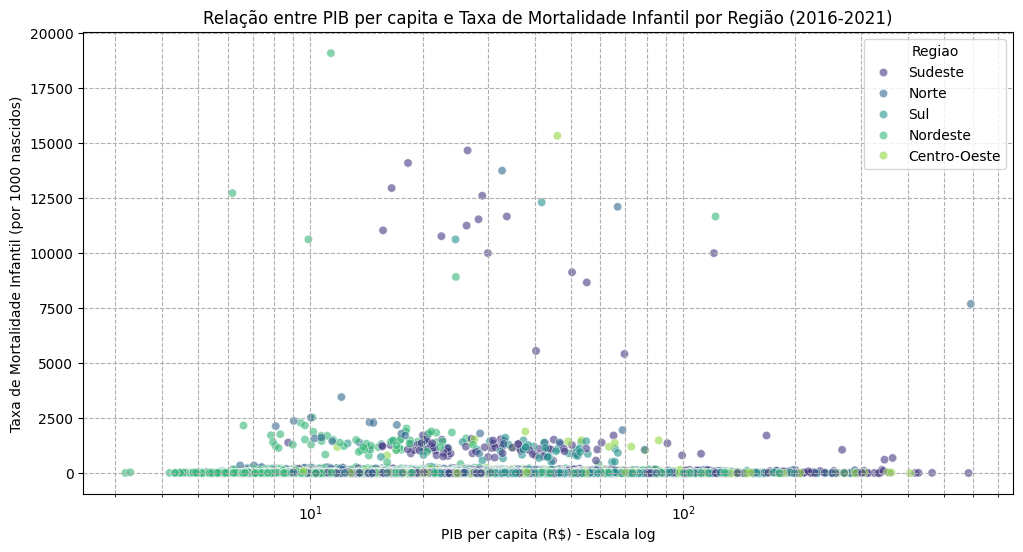

In [56]:
from scipy import stats
try:
    # Cálculo direto das variáveis derivadas (assumindo dados já limpos)
    df_br['PIB_per_capita'] = df_br['PIB'] / df_br['Populacao']
    df_br['Taxa_Mortalidade_Infantil'] = (df_br['NrObitosInfantis'] / df_br['NrNascimentos']) * 1000

    # Removendo infinitos e valores ausentes
    analysis_df = df_br[['PIB_per_capita', 'Taxa_Mortalidade_Infantil', 'Regiao', 'Ano']].replace([np.inf, -np.inf], np.nan).dropna()

    # Análise estatística
    print("\nEstatísticas descritivas:")
    print(analysis_df[['PIB_per_capita', 'Taxa_Mortalidade_Infantil']].describe())

    correlation, p_value = stats.pearsonr(analysis_df['PIB_per_capita'], analysis_df['Taxa_Mortalidade_Infantil'])
    print(f"\nCorrelação entre PIB per capita e Mortalidade Infantil: {correlation:.3f}")
    print(f"Valor-p: {p_value:.3f}")

    # Visualização
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='PIB_per_capita', y='Taxa_Mortalidade_Infantil',
                    hue='Regiao', data=analysis_df, alpha=0.6, palette='viridis')
    plt.title('Relação entre PIB per capita e Taxa de Mortalidade Infantil por Região (2016-2021)')
    plt.xlabel('PIB per capita (R$) - Escala log')
    plt.ylabel('Taxa de Mortalidade Infantil (por 1000 nascidos)')
    plt.xscale('log')  # Melhor visualização para dados econômicos
    plt.grid(True, which="both", ls="--")
    plt.show()

except Exception as e:
    print(f"\nErro durante a análise: {str(e)}")
    print("Verifique se todas as colunas necessárias existem no DataFrame:")
    print(df_br.columns.tolist())

### Densidade Econômica vs. Produtividade

Esse código realiza uma análise da relação entre população e PIB utilizando uma transformação logarítmica, fundamentada na Lei de Zipf,padrão empírico que descreve a distribuição de grandezas econômicas e demográficas em sistemas urbanos e regionais. A adoção da escala log-log nos eixos do gráfico serve para linearizar a relação entre essas variáveis, já que o PIB tipicamente apresenta crescimento não linear em função da população. Ao converter ambos os valores para logaritmo na base 10, a análise transforma uma curva potencialmente exponencial em uma relação passível de interpretação linear, facilitando a identificação de padrões e comparações regionais.

O teste de correlação de Pearson, aplicado às variáveis log-transformadas, quantifica a intensidade e a direção da associação linear entre população e PIB. Um coeficiente próximo de 1 revela uma correlação positiva robusta, indicando que, em média, o aumento populacional está associado a um crescimento proporcional do PIB. O valor de p correspondente atesta a significância estatística dessa relação, descartando a possibilidade de que o padrão observado seja aleatório.

A diferenciação por cores das regiões no gráfico cumpre um papel crítico na visualização, permitindo detectar desvios da tendência geral. Por exemplo, áreas com PIB significativamente maior ou menor do que o previsto para seu porte populacional tornam-se imediatamente identificáveis, sugerindo disparidades na produtividade ou na estrutura econômica regional.

Os resultados gráficos exibem uma clara tendência linear ascendente na dispersão dos pontos, corroborando a hipótese de que regiões mais populosas tendem a gerar PIBs mais elevados. Contudo, os outliers presentes – como áreas com alta produtividade econômica apesar de populações reduzidas, ou vice-versa – merecem atenção especial. Esses casos podem refletir dinâmicas econômicas particulares, como a presença de polos industriais concentrados, vantagens logísticas ou dependência de recursos naturais, que distorcem a relação geral entre população e produção econômica.

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


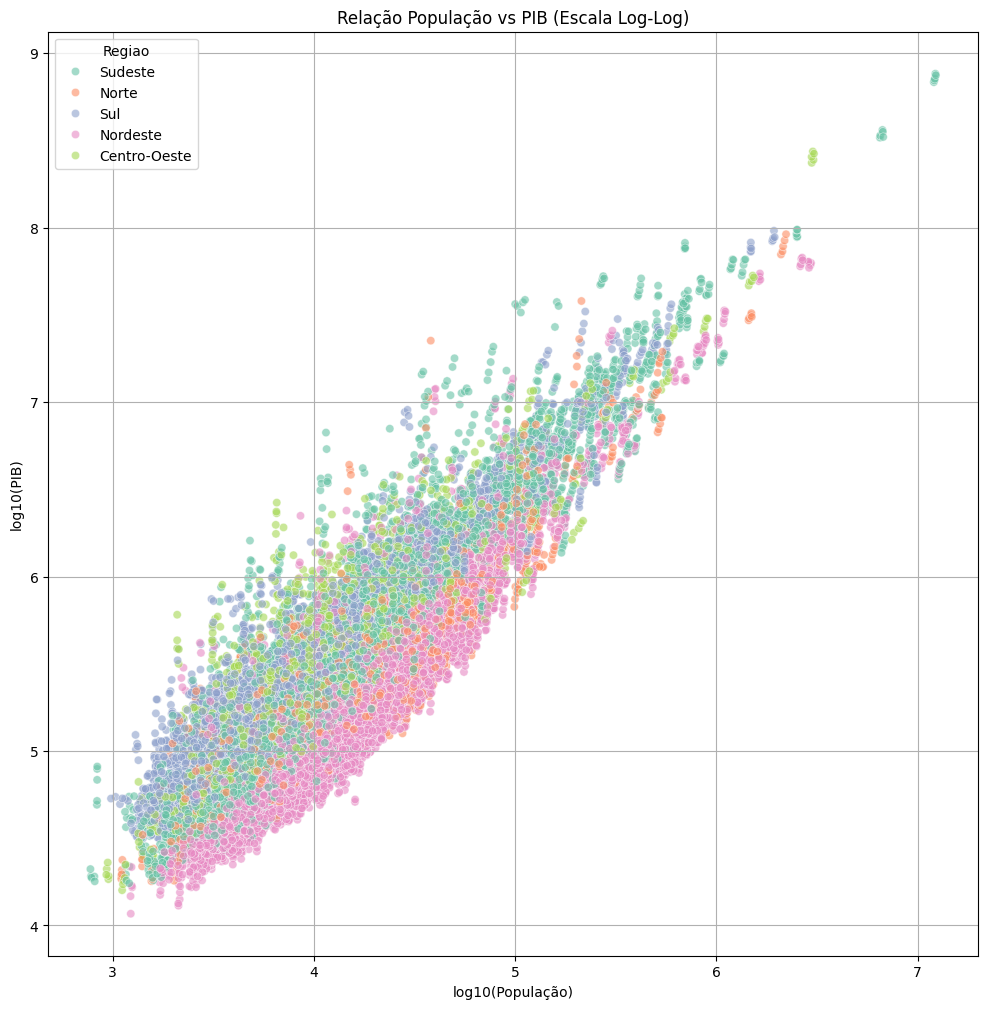

Correlação População-PIB (log): nan (p=nan)

Correlação PIB-Mortalidade controlada por região: nan (p=nan)


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:4623: RuntimeWarning: invalid value encountered in subtract
  xm = x - xmean
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:4624: RuntimeWarning: invalid value encountered in subtract
  ym = y - ymean


In [57]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Ensure PIB_per_capita is calculated within the df_br DataFrame
df_br['PIB_per_capita'] = df_br['PIB'] / df_br['Populacao']

## Análise 1: Relação População vs PIB (Lei de Zipf)
plt.figure(figsize=(12,12))
sns.scatterplot(
    x=np.log10(df_br['Populacao']),
    y=np.log10(df_br['PIB']),
    hue=df_br['Regiao'],
    alpha=0.6,
    palette='Set2'
)
plt.title('Relação População vs PIB (Escala Log-Log)')
plt.xlabel('log10(População)')
plt.ylabel('log10(PIB)')
plt.grid(True)
plt.show()

# Teste de correlação
corr_pop_pib, p_pop_pib = stats.pearsonr(
    np.log10(df_br['Populacao']),
    np.log10(df_br['PIB'])
)
print(f"Correlação População-PIB (log): {corr_pop_pib:.3f} (p={p_pop_pib:.3f})")


# Correlação parcial controlada por região
from scipy.stats import pearsonr
partial_corr = pearsonr(
    df_br['PIB_per_capita'],
    df_br['Taxa_Mortalidade_Infantil'] - df_br.groupby('Regiao')['Taxa_Mortalidade_Infantil'].transform('mean')
)
print(f"\nCorrelação PIB-Mortalidade controlada por região: {partial_corr[0]:.3f} (p={partial_corr[1]:.3f})")

### Eficiência Agrícola por Região

Para analisar a eficiência agrícola nas diferentes regiões do Brasil, foi utilizada uma abordagem de associação entre variáveis categóricas,regiões, e uma variável contínua ,eficiência agrícola. A eficiência agrícola foi definida como a razão entre o valor da produção agrícola ,em reais, e a área plantada ,em hectares, representando o rendimento econômico por hectare cultivado. Essa métrica foi escolhida por refletir diretamente o desempenho produtivo das regiões em termos de retorno financeiro por área utilizada.

No tratamento dos dados, foi criado um novo atributo chamado Eficiencia_Agricola por meio da divisão do valor da produção pela área plantada (df_br['VlProducaoAgricola'] / df_br['AreaPlantada_h']). Essa transformação permitiu padronizar o desempenho agrícola, tornando possível comparar regiões com diferentes tamanhos e volumes de produção de forma proporcional.

Para investigar a associação entre a região e a eficiência agrícola, foram extraídos os dados de eficiência por região, agrupando-os com base na variável categórica Regiao. A escolha dessa estrutura permitiu isolar o comportamento de cada grupo de forma independente, condição necessária para a aplicação de um teste estatístico de comparação entre grupos. Foi então utilizado o teste ANOVA ,Análise de Variância, que é indicado para avaliar se existem diferenças estatisticamente significativas nas médias da variável contínua entre três ou mais grupos categóricos. No código, as listas com os dados de eficiência agrícola por região foram passadas como parâmetros para a função f_oneway, da biblioteca scipy.stats, que retornou um valor F e um p-valor.

A estatística F indica o grau de separação entre as médias dos grupos em relação à variabilidade interna de cada grupo. Já o p-valor informa a probabilidade de se obter essas diferenças observadas por acaso. Caso o p-valor seja menor que um nível de significância adotado, podemos afirmar que há diferenças estatísticas significativas na eficiência agrícola entre ao menos duas regiões.

O boxplot gerado com os resultados reforça essa análise. Observa-se que, embora todas as regiões apresentem uma grande quantidade de valores concentrados próximos da base, indicando baixa eficiência na maioria dos casos, há uma dispersão notável de outliers em todas elas, com destaque para o Sudeste e Sul, que mostram maiores amplitudes nos valores extremos. Essa visualização confirma a existência de variabilidade significativa dentro de cada grupo, mas também sugere padrões distintos entre as regiões. A presença desses outliers e a largura dos boxes, que representam os intervalos interquartis, indicam diferenças estruturais na produtividade agrícola que justificam a aplicação do teste estatístico.

<ipython-input-58-689b5fd29688>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Regiao',


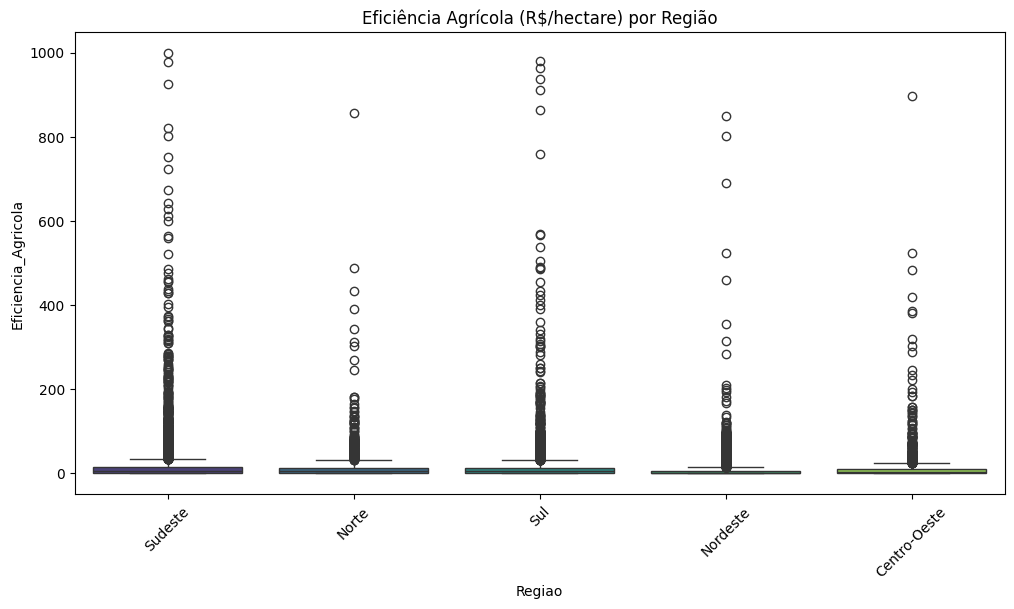


ANOVA Eficiência Agrícola entre Regiões: F=nan, p=nan


/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:3904: RuntimeWarning: invalid value encountered in subtract
  alldata = alldata - offset
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:3912: RuntimeWarning: invalid value encountered in subtract
  smo_ss = _square_of_sums(sample - offset, axis=axis)


In [58]:
df_br['Eficiencia_Agricola'] = df_br['VlProducaoAgricola'] / df_br['AreaPlantada_h']

plt.figure(figsize=(12,6))
sns.boxplot(x='Regiao',
            y='Eficiencia_Agricola',
            data=df_br[df_br['Eficiencia_Agricola'].between(0, 1000)],  # Remove outliers
            palette='viridis')
plt.title('Eficiência Agrícola (R$/hectare) por Região')
plt.xticks(rotation=45)
plt.show()

regioes = df_br['Regiao'].unique()
grupos = [df_br[df_br['Regiao'] == reg]['Eficiencia_Agricola'].dropna() for reg in regioes]
f_stat, p_value = stats.f_oneway(*grupos)
print(f"\nANOVA Eficiência Agrícola entre Regiões: F={f_stat:.1f}, p={p_value:.3f}")

###Análise Espacial da Letalidade da COVID-19 no Brasil

Nesta subseção, realizamos uma análise da letalidade da COVID-19 nos estados brasileiros, considerando a proporção de óbitos em relação ao total de casos confirmados (deaths_by_totalCases). Para tornar a comparação mais justa entre estados com diferentes tamanhos populacionais, essa taxa foi ajustada pela população estimada de cada estado.

A visualização foi feita por meio de mapas temáticos do Brasil para os anos de 2020 a 2023, com cores representando a intensidade da letalidade ajustada. Assim, conseguimos observar padrões espaciais e temporais da pandemia no país, permitindo compreender como a situação evoluiu em diferentes regiões ao longo do tempo.

Essa análise é útil para destacar disparidades regionais, identificar estados com maior ou menor impacto e fornecer insumos para estudos epidemiológicos e decisões de política pública

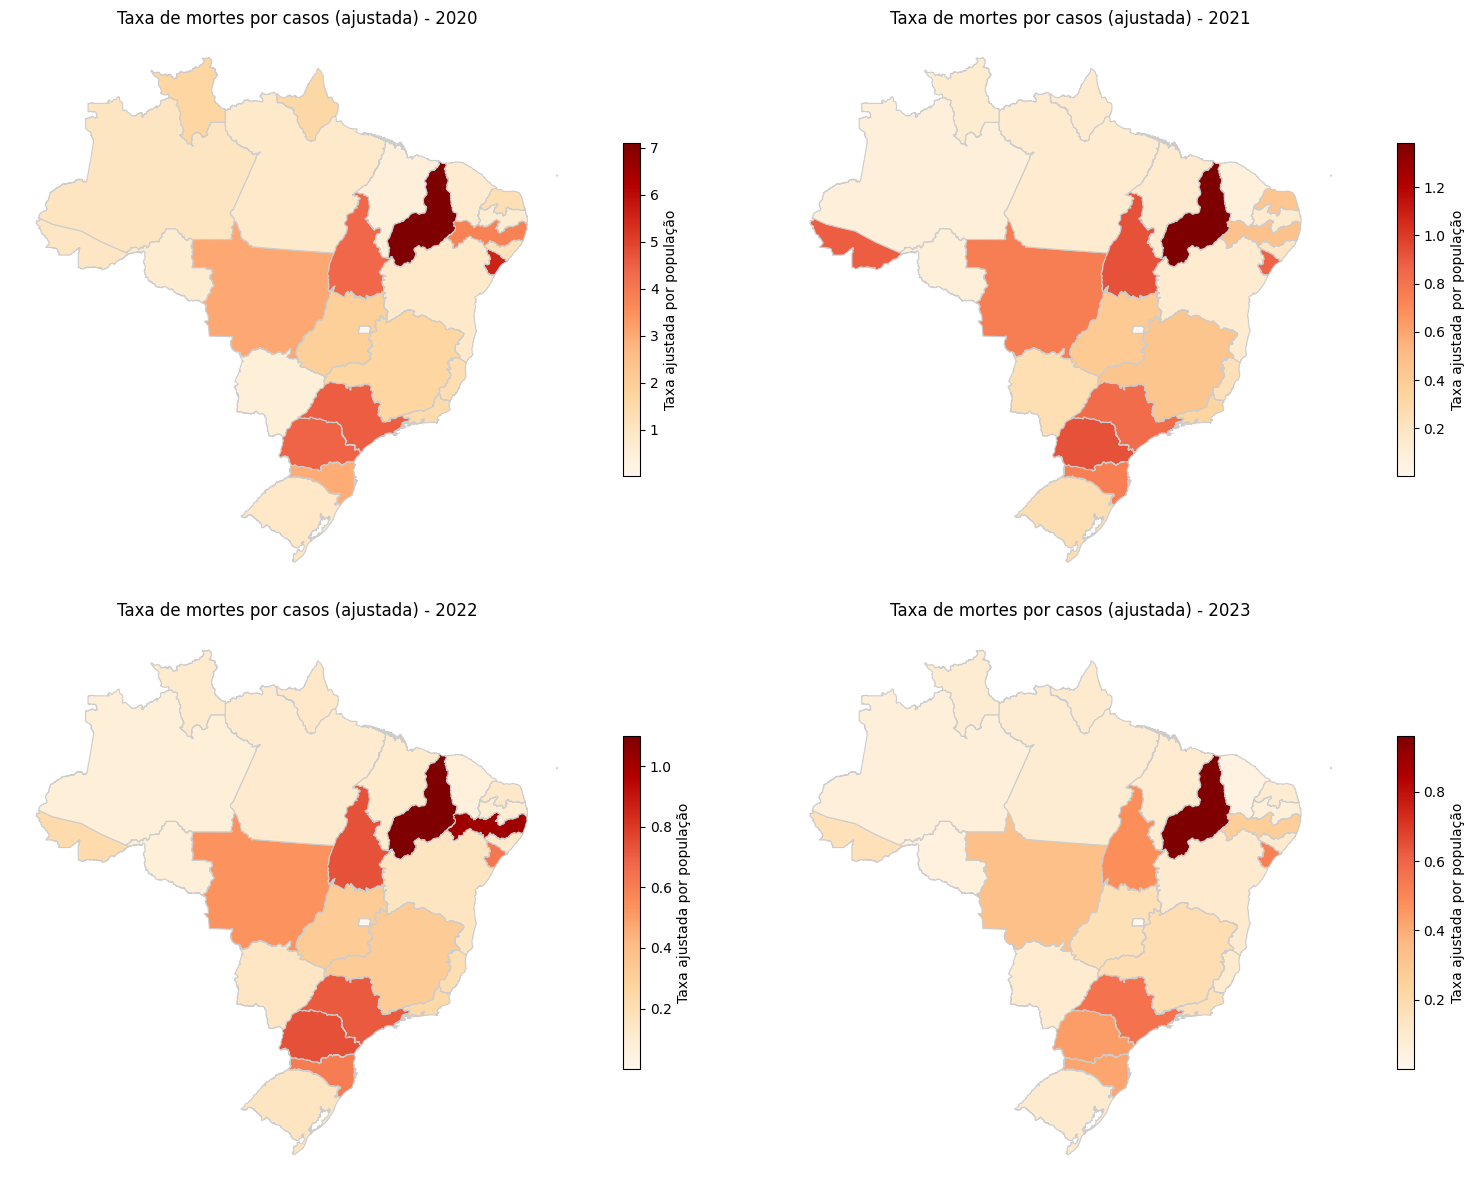

In [89]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Agrupar df_todos_max por state e ano
df_state_year = df_todos_max.groupby(['state', 'ano'])['deaths_by_totalCases'].mean().reset_index()

# Pegar a população mais recente de cada estado no df_br
df_pop = df_br.sort_values('Ano', ascending=False).drop_duplicates('UF')[['UF', 'Populacao']]

# Renomear para poder juntar
df_pop.rename(columns={'UF': 'state', 'Populacao': 'pop'}, inplace=True)

# Juntar os dados
df_merged = df_state_year.merge(df_pop, on='state')

# Calcular taxa ajustada pela população
df_merged['deaths_by_cases_per_100k_pop'] = (df_merged['deaths_by_totalCases'] / df_merged['pop']) * 100000

# Carregar mapa do Brasil por estados
estados_for_merge = estados.copy()
estados_for_merge.rename(columns={'sigla': 'state'}, inplace=True)

# Loop por ano
anos = [2020, 2021, 2022, 2023]
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs = axs.flatten()

for i, ano in enumerate(anos):
    ax = axs[i]
    df_ano = df_merged[df_merged['ano'] == ano]

    mapa_dados = estados_for_merge.merge(df_ano, on='state', how='left')

    mapa_dados['deaths_by_cases_per_100k_pop'] = mapa_dados['deaths_by_cases_per_100k_pop'].fillna(0)


    mapa_dados.plot(
        column='deaths_by_cases_per_100k_pop',
        cmap='OrRd',
        linewidth=0.8,
        ax=ax,
        edgecolor='0.8',
        legend=True,
        legend_kwds={'label': "Taxa ajustada por população", 'shrink': 0.6}
    )

    ax.set_title(f"Taxa de mortes por casos (ajustada) - {ano}")
    ax.axis('off')

plt.tight_layout()
plt.show()


####Estatíticas e Teorema Central do Limite

Antes de aprofundarmos as inferências e correlações, é essencial compreender os fundamentos estatísticos dos dados analisados. Esta seção apresenta os seguintes conceitos:

* Distribuições e Histograma

* Função de Distribuição Acumulada

* Teorema Central do Limite

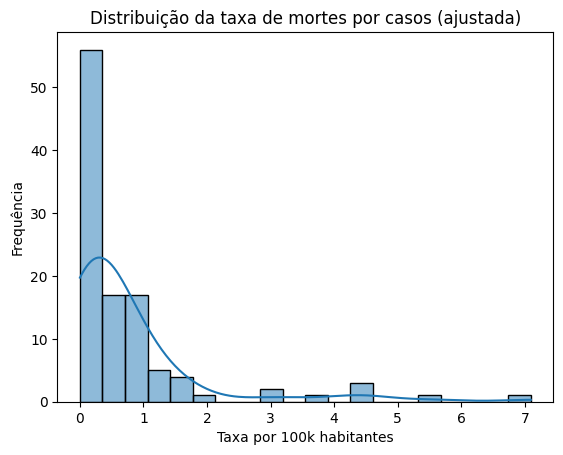

In [83]:
import seaborn as sns

sns.histplot(df_merged['deaths_by_cases_per_100k_pop'], bins=20, kde=True)
plt.title('Distribuição da taxa de mortes por casos (ajustada)')
plt.xlabel('Taxa por 100k habitantes')
plt.ylabel('Frequência')
plt.show()


Este gráfico mostra a distribuição da taxa de mortes ajustada por 100 mil habitantes. Podemos observar que a maioria dos municípios possui taxas muito baixas de mortalidade, com uma grande concentração próxima a zero. Isso indica uma distribuição assimétrica à direita (distribuição enviesada positiva), onde poucos municípios apresentam taxas muito elevadas. Essa assimetria é comum em dados epidemiológicos, especialmente em regiões com populações menores ou menos acesso à saúde.

A linha azul representa uma estimativa da densidade da distribuição, ajudando a visualizar o comportamento da curva. O gráfico mostra que os valores mais comuns estão entre 0 e 1, mas há outliers que atingem até 7 mortes por 100 mil habitantes.

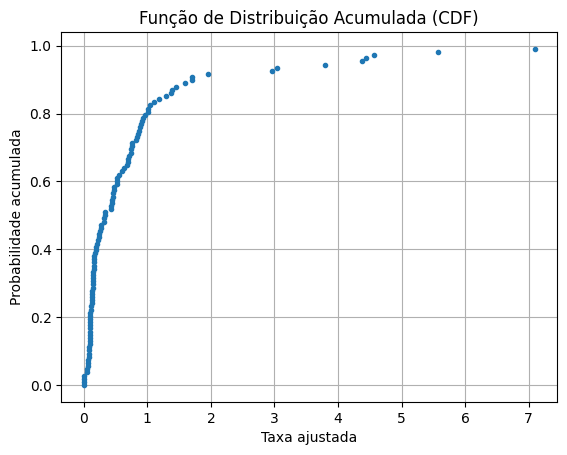

In [84]:
import numpy as np

sorted_data = np.sort(df_merged['deaths_by_cases_per_100k_pop'])
cdf = np.arange(len(sorted_data)) / float(len(sorted_data))

plt.plot(sorted_data, cdf, marker='.', linestyle='none')
plt.title('Função de Distribuição Acumulada (CDF)')
plt.xlabel('Taxa ajustada')
plt.ylabel('Probabilidade acumulada')
plt.grid(True)
plt.show()


A CDF (Cumulative Distribution Function) mostra a probabilidade acumulada de se encontrar uma taxa de mortalidade menor ou igual a um determinado valor. Aqui, vemos que aproximadamente:

* 50% dos municípios têm uma taxa ajustada menor que 0,5,

* 80% têm taxa menor que 1,5,

* E quase 100% estão abaixo de 7.

A curva cresce rapidamente no início e desacelera à medida que os valores aumentam, confirmando a concentração de dados nas faixas mais baixas e a existência de poucos valores altos (outliers).

Essa função é útil para entender a proporção de municípios abaixo de determinados limiares, o que pode auxiliar na definição de políticas públicas.

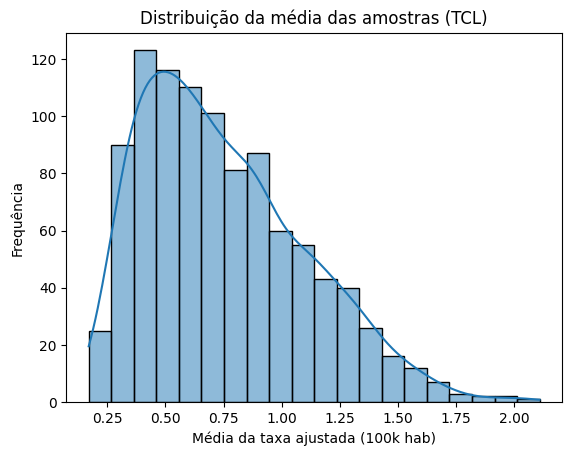

In [85]:
import random

amostras = []
for _ in range(1000):
    amostra = df_merged['deaths_by_cases_per_100k_pop'].sample(n=10)
    amostras.append(amostra.mean())

sns.histplot(amostras, kde=True)
plt.title('Distribuição da média das amostras (TCL)')
plt.xlabel('Média da taxa ajustada (100k hab)')
plt.ylabel('Frequência')
plt.show()


A distribuição das médias amostrais da taxa de mortalidade segue um padrão aproximadamente normal, como previsto pelo Teorema Central do Limite. Isso confirma que, mesmo que a distribuição original seja enviesada, a média das amostras se comporta de maneira previsível e simétrica, permitindo a aplicação de técnicas inferenciais com maior confiabilidade.

####Inferência Estatística

A correlação é uma técnica estatística usada para medir o grau de associação entre duas variáveis numéricas. No nosso caso, buscamos entender se existe alguma relação entre a população de um estado e a taxa de mortes ajustada por 100 mil habitantes.

Essa análise nos ajuda a responder perguntas como:

"Estados mais populosos tiveram taxas de mortalidade maiores ou menores proporcionalmente à sua população?"

A medida utilizada é o coeficiente de correlação de Pearson, que varia entre:

* -1: correlação negativa perfeita

* 0: nenhuma correlação

* +1: correlação positiva perfeita

Além disso, usamos o valor-p (p-value) para saber se a correlação encontrada é estatisticamente significativa.

---
Correlação entre População e Taxa de Mortalidade por Casos:

In [91]:
from scipy.stats import pearsonr

print("Correlação entre População e Taxa de Mortalidade por Casos")
corr, p = pearsonr(df_merged['pop'], df_merged['deaths_by_cases_per_100k_pop'])
print(f"Correlação: {corr:.4f}, valor-p: {p:.4f}")


Correlação entre População e Taxa de Mortalidade por Casos
Correlação: -0.1310, valor-p: 0.1766


Isso indica uma correlação fraca e negativa, mas estatisticamente não significativa (p > 0.05).

* Portanto, não há evidências suficientes para afirmar que há uma relação linear significativa entre o tamanho da população e a taxa de mortalidade proporcional aos casos.

---
Comparação da Mortalidade Proporcional por Casos entre as Regiões Norte e Sul:

Nesta análise, comparamos dois grupos de estados (por exemplo, Norte e Sul) para verificar se a média das taxas de mortes ajustadas difere significativamente entre eles.

A técnica usada é o teste t para duas amostras independentes (t-test), que avalia se as médias de dois grupos são estatisticamente diferentes.

Esse teste é muito usado em ciências para comparar grupos distintos (ex.: tratamento vs controle, antes vs depois, região A vs região B).

🔹 Como Funciona:

* Calcula a média das taxas para cada grupo.

* Verifica se a diferença entre as médias pode ter ocorrido ao acaso.

* Se o valor-p for menor que 0.05, significa que a diferença é estatisticamente significativa.

In [90]:
regioes = {
    'Norte': ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO'],
    'Sul': ['RS', 'SC', 'PR'],
}

df_merged['regiao'] = df_merged['state'].map(lambda x: 'Norte' if x in regioes['Norte'] else ('Sul' if x in regioes['Sul'] else 'Outras'))

# Comparar dois grupos
grupo1 = df_merged[df_merged['regiao'] == 'Norte']['deaths_by_cases_per_100k_pop']
grupo2 = df_merged[df_merged['regiao'] == 'Sul']['deaths_by_cases_per_100k_pop']

t_stat, p_value = ttest_ind(grupo1, grupo2)

print(f"Estatística t: {t_stat:.4f}, valor-p: {p_value:.4f}")


Estatística t: -1.3590, valor-p: 0.1821


Esse resultado indica que a diferença entre as médias dos dois grupos não é estatisticamente significativa ao nível de 5%.

* Assim, não é possível afirmar com base nesses dados que a taxa de mortalidade proporcional por casos difere significativamente entre as regiões Norte e Sul do Brasil.

####Regras de Associação

As regras de associação são técnicas amplamente usadas na mineração de dados para descobrir padrões frequentes entre elementos que aparecem juntos em um conjunto de dados.

Um exemplo famoso de uso é no varejo:

 -- "Se o cliente compra pão e leite, então ele provavelmente comprará manteiga."

No nosso caso, aplicamos essa lógica para entender padrões como:

* Estados com população pequena tendem a ter taxas de mortalidade altas?

* Regiões com baixa taxa também têm baixa população?

🔹 Como Funciona:

1 - Cada linha é tratada como uma transação com múltiplos itens (ex: "população baixa", "taxa alta").

2 - O algoritmo Apriori identifica quais combinações ocorrem com frequência.

3 - Gera regras do tipo:
Se: {pop_pequena}, Então: {taxa_alta}

-- E calcula 3 medidas importantes:

* Suporte: frequência com que a regra aparece.

* Confiança: chance de a consequência acontecer dado o antecedente.

* Lift: força da regra em relação ao acaso (acima de 1 = relação positiva).

In [88]:
def classificar_taxa(taxa):
    if taxa < 10:
        return 'taxa_baixa'
    elif taxa < 30:
        return 'taxa_média'
    else:
        return 'taxa_alta'

def classificar_pop(pop):
    if pop < 2_000_000:
        return 'pop_pequena'
    elif pop < 6_000_000:
        return 'pop_média'
    else:
        return 'pop_grande'

df_assoc = df_merged.copy()
df_assoc['taxa_cat'] = df_assoc['deaths_by_cases_per_100k_pop'].apply(classificar_taxa)
df_assoc['pop_cat'] = df_assoc['pop'].apply(classificar_pop)

transacoes = df_assoc[['taxa_cat', 'pop_cat']].values.tolist()

te = TransactionEncoder()
te_ary = te.fit(transacoes).transform(transacoes)
df_trans = pd.DataFrame(te_ary, columns=te.columns_)

frequentes = apriori(df_trans, min_support=0.1, use_colnames=True)
regras = association_rules(frequentes, metric="confidence", min_threshold=0.6)

regras[['antecedents', 'consequents', 'support', 'confidence', 'lift']]


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


antecedents    consequents   support  confidence  lift
0   (taxa_baixa)  (pop_pequena)  0.962963    0.962963   1.0
1  (pop_pequena)   (taxa_baixa)  0.962963    1.000000   1.0

* Há uma forte coocorrência entre estados de população pequena e taxa de mortes baixa (quase todos os casos).

* Mas o Lift = 1 nos alerta que essa coocorrência pode não indicar uma relação causal ou associativa forte – pode ser apenas porque ambos os atributos são muito comuns no conjunto.

## Perguntas


<p>Nessa seção apresentaremos algumas perguntas que foram elaboradas pelo grupo e serão analisadas no decorrer do Projeto.
<p>Como explicitado na introdução, muitas dessas perguntas tentarão responder e encontrar uma correlação entre as características das cidades e o impacto que a pandemia de COVID-19 gerou nestas.
<p>Além das perguntas voltadas a esta temática, algumas outras serão apresentadas, que representam mais algumas curiosidades dos integrantes do grupo, como algumas envolvendo as cidades-natal destes (Caratinga, Itaúna, Pará de Minas e Ubá, todas de Minas Gerais).


1.   Quais cidades registraram os maiores números absolutos de óbitos infantis e as maiores razões de óbito/nascimento infantil durante a pandemia (2020-2021)?

2.   Qual foi a variação no número total de empresas entre o período pré-pandemia (2016-2019) e o período pandêmico (2020-2021)? Que conclusões podemos extrair dessa análise?

3.   Qual a soma dos maiores valores de produção agrícola por cidade no período pré-pandêmico (2016-2019) comparado ao período pandêmico (2020-2021)?

4.   Quais cidades apresentaram a menor eficiência agrícola (razão entre área colhida e área plantada) durante a pandemia (2020-2021) e como isso se compara ao período anterior (2016-2019)?

5.   Considerando as 10 cidades com maior produção pecuária no período pré-pandêmico, qual foi a variação na produção dessas cidades durante a pandemia?

6.  Como o crescimento do PIB dos municípios brasileiros entre 2018 e 2019 se comportou em relação a 2019 e 2020, início do período pandêmico?

7.   Existe correlação entre receitas municipais e indicadores de qualidade de vida, como mortalidade infantil?

8.   Há relação direta entre área plantada/colhida e valor total da produção agrícola?

9.   Municípios com maior volume de exportações apresentam melhores indicadores econômicos?

10.   Qual foi o impacto da pandemia nos fluxos de importação e exportação por região?

11.   Quais foram os valores extremos (máximos e mínimos) de PIB, importações e exportações nas cidades de Caratinga, Itaúna, Pará de Minas e Ubá durante a pandemia (2020-2021)?

12.   Como se comparam as taxas de letalidade (deaths_by_totalCases) nas cidades-natal dos integrantes do grupo em relação aos seus PIBs?

13.   Qual porcentagem da população foi infectada por COVID-19 anualmente nas cidades-natal dos integrantes?

14.   Qual a mortalidade por COVID-19 nas 10 cidades com maior e menor PIB? Existe correlação entre PIB e mortalidade?

##Resolução das Questões

###Pergunta 01
Quais cidades registraram os maiores números absolutos de óbitos infantis e as maiores razões de óbito/nascimento infantil durante a pandemia (2020-2021)?

<ipython-input-35-f4d9f33f69be>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pandemia.loc[:, 'Razao_Obito_Nascimento'] = df_pandemia['NrObitosInfantis'] / df_pandemia['NrNascimentos']
<ipython-input-35-f4d9f33f69be>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_obitos_infantis, x='Municipio', y='NrObitosInfantis', palette='viridis')


Cidade com maior número absoluto de óbitos infantis:
Rio de Janeiro - Óbitos infantis: 8850

Cidade com maior razão óbito/nascimento infantil:
Santana - Razão óbito/nascimento: 15.9091


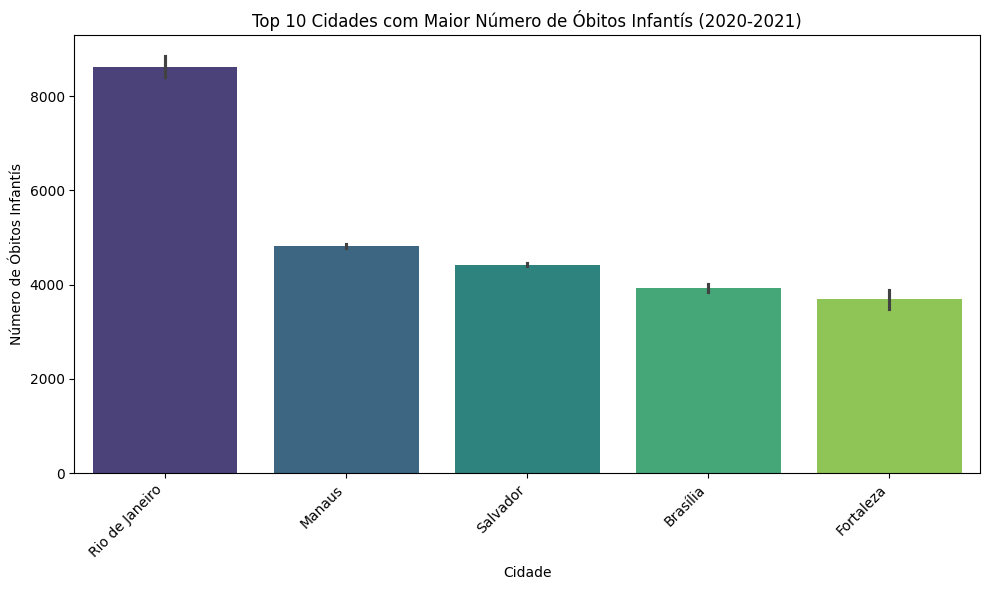

<ipython-input-35-f4d9f33f69be>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_razao_obito_nascimento, x='Municipio', y='Razao_Obito_Nascimento', palette='viridis')


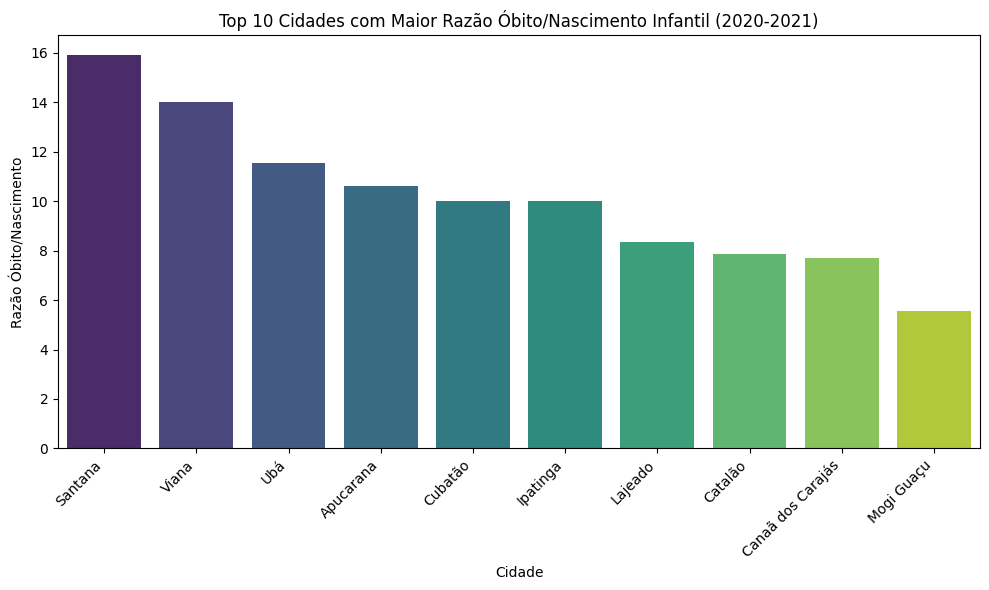

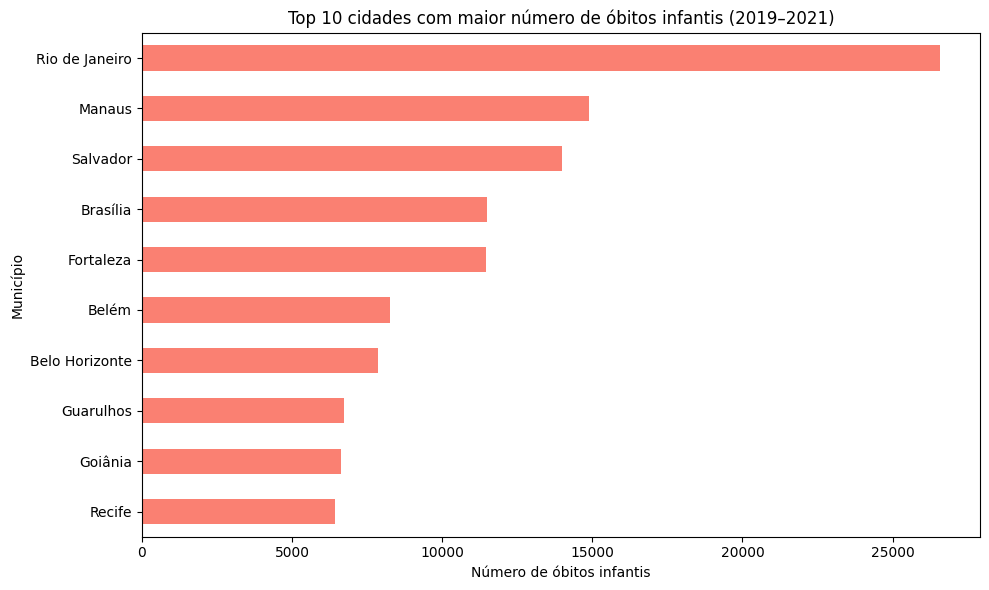

Text(0.5, 1.0, 'Distribuição da razão óbitos/nascimentos infantis')

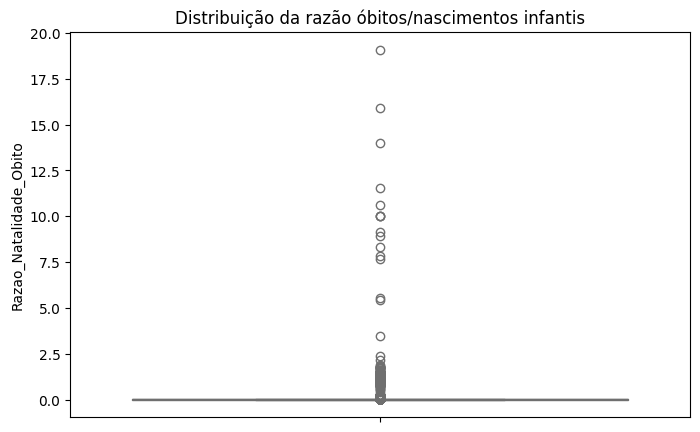

In [ ]:
# Filtrando os dados para os anos de 2020 e 2021
df_pandemia = df_br[df_br['Ano'].isin([2020, 2021])]

# 1. Encontrando a cidade com maior número absoluto de óbitos infantis
cidade_maior_obito_infantil = df_pandemia.loc[df_pandemia['NrObitosInfantis'].idxmax()]

# 2. Calculando a razão óbito/nascimento infantil
df_pandemia.loc[:, 'Razao_Obito_Nascimento'] = df_pandemia['NrObitosInfantis'] / df_pandemia['NrNascimentos']

# Encontrando a cidade com maior razão óbito/nascimento infantil
cidade_maior_razao_obito_nascimento = df_pandemia.loc[df_pandemia['Razao_Obito_Nascimento'].idxmax()]

# Exibindo os resultados
print("Cidade com maior número absoluto de óbitos infantis:")
print(f"{cidade_maior_obito_infantil['Municipio']} - Óbitos infantis: {cidade_maior_obito_infantil['NrObitosInfantis']}")

print("\nCidade com maior razão óbito/nascimento infantil:")
print(f"{cidade_maior_razao_obito_nascimento['Municipio']} - Razão óbito/nascimento: {cidade_maior_razao_obito_nascimento['Razao_Obito_Nascimento']:.4f}")

# 3. Visualizando os resultados em gráfico

# Selecionando as top 10 cidades com maior número de óbitos infantis e maior razão óbito/nascimento
top_obitos_infantis = df_pandemia[['Municipio', 'NrObitosInfantis']].sort_values(by='NrObitosInfantis', ascending=False).head(10)
top_razao_obito_nascimento = df_pandemia[['Municipio', 'Razao_Obito_Nascimento']].sort_values(by='Razao_Obito_Nascimento', ascending=False).head(10)

# Gráfico de barras para o maior número de óbitos infantis
plt.figure(figsize=(10, 6))
sns.barplot(data=top_obitos_infantis, x='Municipio', y='NrObitosInfantis', palette='viridis')
plt.title('Top 10 Cidades com Maior Número de Óbitos Infantís (2020-2021)')
plt.ylabel('Número de Óbitos Infantís')
plt.xlabel('Cidade')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Gráfico de barras para a maior razão óbito/nascimento
plt.figure(figsize=(10, 6))
sns.barplot(data=top_razao_obito_nascimento, x='Municipio', y='Razao_Obito_Nascimento', palette='viridis')
plt.title('Top 10 Cidades com Maior Razão Óbito/Nascimento Infantil (2020-2021)')
plt.ylabel('Razão Óbito/Nascimento')
plt.xlabel('Cidade')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Outro Gráfico

df_2019_2021 = df_br[df_br['Ano'].isin([2019, 2020, 2021])]

# Top 10 cidades com maior número absoluto de óbitos infantis no período
top10_obitos = df_2019_2021.groupby("Municipio")["NrObitosInfantis"].sum().sort_values(ascending=False).head(10)

top10_obitos.plot(kind='barh', figsize=(10, 6), color='salmon')
plt.title("Top 10 cidades com maior número de óbitos infantis (2019–2021)")
plt.xlabel("Número de óbitos infantis")
plt.ylabel("Município")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Criando a razão óbitos/nascimentos para o período 2019–2021
df_razao = df_2019_2021.copy()
df_razao["Razao_Natalidade_Obito"] = df_razao["NrObitosInfantis"] / df_razao["NrNascimentos"]

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_razao, y="Razao_Natalidade_Obito", color='skyblue')
plt.title("Distribuição da razão óbitos/nascimentos infantis")


###Pergunta 02

Qual foi a variação no número total de empresas entre o período pré-pandemia (2016-2019) e o período pandêmico (2020-2021)? Que conclusões podemos extrair dessa análise?

Total de empresas (2016–2019): 55370863
Total de empresas (2020–2021): 28764864
Diferença no número total de empresas: 26605999
Teve redução no número total de empresas entre 2020 e 2021 em comparação com 2016 a 2019.


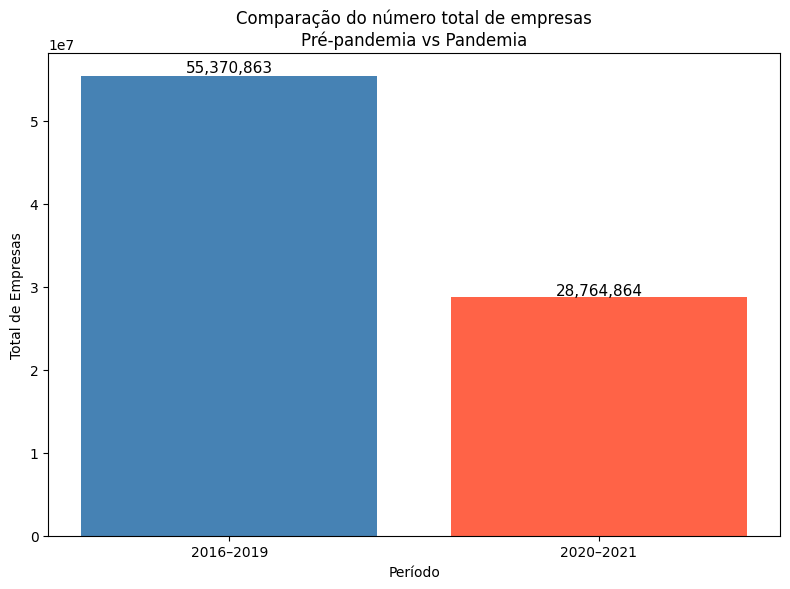

<ipython-input-60-7844287f6db0>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_empresas_ano, x='Ano', y='QtEmpresas', palette='mako')


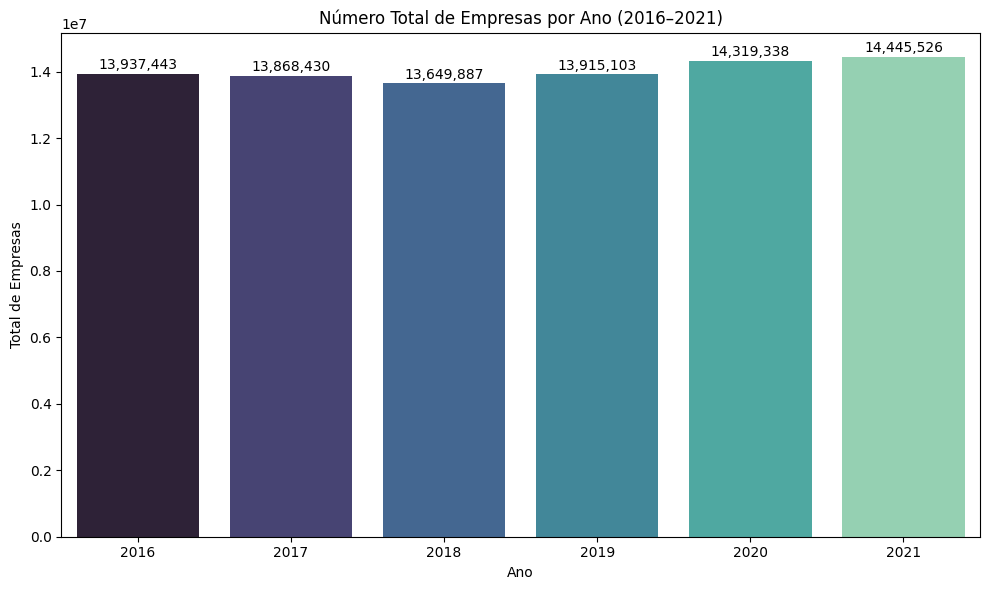

In [60]:
coluna_empresas = 'QtEmpresas'
coluna_ano = 'Ano'

df_br[coluna_empresas] = pd.to_numeric(df_br[coluna_empresas], errors='coerce')
df_br[coluna_ano] = pd.to_numeric(df_br[coluna_ano], errors='coerce')

total_pre_pandemia = df_br[df_br[coluna_ano].between(2016, 2019)][coluna_empresas].sum()
total_pandemia = df_br[df_br[coluna_ano].between(2020, 2021)][coluna_empresas].sum()

diferenca = total_pandemia - total_pre_pandemia

if diferenca > 0:
    conclusao = "Teve aumento no número total de empresas entre 2020 e 2021 em comparação com 2016 a 2019."
elif diferenca < 0:
    conclusao = "Teve redução no número total de empresas entre 2020 e 2021 em comparação com 2016 a 2019."
else:
    conclusao = "Nada mudou."

print(f"Total de empresas (2016–2019): {total_pre_pandemia}")
print(f"Total de empresas (2020–2021): {total_pandemia}")
print(f"Diferença no número total de empresas: {abs(diferenca)}")
print(conclusao)

# Gráficos
periodos = ['2016–2019', '2020–2021']
valores = [total_pre_pandemia, total_pandemia]

plt.figure(figsize=(8, 6))
plt.bar(periodos, valores, color=['steelblue', 'tomato'])
plt.title("Comparação do número total de empresas\nPré-pandemia vs Pandemia")
plt.ylabel("Total de Empresas")
plt.xlabel("Período")
for i, v in enumerate(valores):
    plt.text(i, v + (v * 0.01), f'{int(v):,}', ha='center', fontsize=11)
plt.tight_layout()
plt.show()

df_empresas_ano = df_br[df_br['Ano'].between(2016, 2021)].groupby('Ano')['QtEmpresas'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_empresas_ano, x='Ano', y='QtEmpresas', palette='mako')
plt.title('Número Total de Empresas por Ano (2016–2021)')
plt.ylabel('Total de Empresas')
plt.xlabel('Ano')
for index, row in df_empresas_ano.iterrows():
    plt.text(index, row['QtEmpresas'] + (row['QtEmpresas'] * 0.01), f'{int(row["QtEmpresas"]):,}', ha='center', fontsize=10)
plt.tight_layout()
plt.show()


###Pergunta 03

Qual a soma dos maiores valores de produção agrícola por cidade no período pré-pandêmico (2016-2019) comparado ao período pandêmico (2020-2021)?

Soma dos maiores valores de produção por cidade (2016–2019): R$ 9,302,343.00
Soma dos maiores valores de produção por cidade (2020–2021): R$ 10,505,480.00


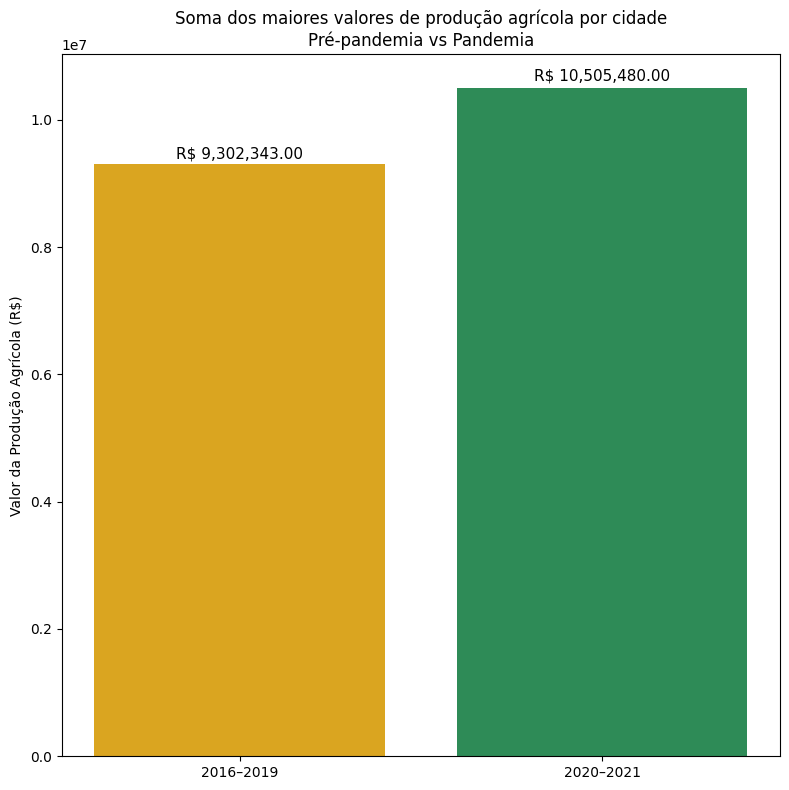

In [ ]:
df_br["VlProducaoAgricola"] = pd.to_numeric(df_br["VlProducaoAgricola"], errors='coerce')

df_pre_pandemia = df_br[df_br["Ano"].between(2016, 2019)]
df_pandemia = df_br[df_br["Ano"].between(2020, 2021)]

max_por_cidade_pre = df_pre_pandemia.groupby("Municipio")["VlProducaoAgricola"].max()
max_por_cidade_pand = df_pandemia.groupby("Municipio")["VlProducaoAgricola"].max()

soma_pre = max_por_cidade_pre.sum()
soma_pand = max_por_cidade_pand.sum()

print(f"Soma dos maiores valores de produção por cidade (2016–2019): R$ {soma_pre:,.2f}")
print(f"Soma dos maiores valores de produção por cidade (2020–2021): R$ {soma_pand:,.2f}")

# Gráfico
periodos = ['2016–2019', '2020–2021']
valores = [soma_pre, soma_pand]

plt.figure(figsize=(8, 8))
plt.bar(periodos, valores, color=['goldenrod', 'seagreen'])
plt.title("Soma dos maiores valores de produção agrícola por cidade\nPré-pandemia vs Pandemia")
plt.ylabel("Valor da Produção Agrícola (R$)")
for i, v in enumerate(valores):
    plt.text(i, v + (v * 0.01), f'R$ {v:,.2f}', ha='center', fontsize=11)
plt.tight_layout()
plt.show()

###Pergunta 04


###Pergunta 05

###Pergunta 06

Como o crescimento do PIB dos municípios brasileiros entre 2018 e 2019 se comportou em relação a 2019 e 2020, início do período pandêmico?

PIB 2018: R$ 7,002,886,037.00
PIB 2019: R$ 7,387,824,104.00
Crescimento 2018–2019: R$ 384,938,067.00 (5.50%)
PIB 2020: R$ 7,608,057,505.00
Crescimento 2019–2020: R$ 220,233,401.00 (2.89%)


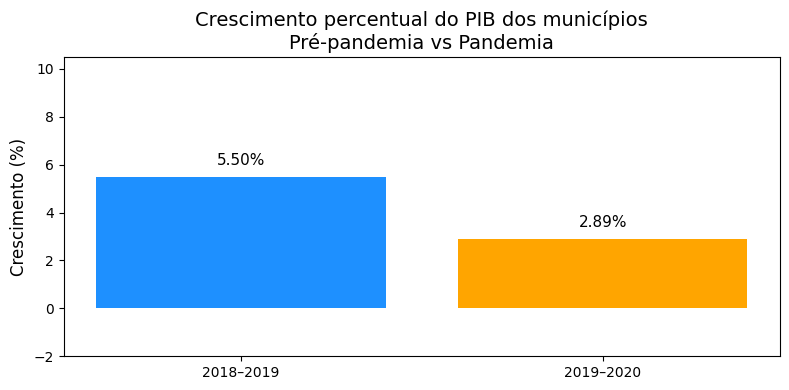

In [61]:

df_br["PIB"] = pd.to_numeric(df_br["PIB"], errors="coerce")

pib_2018 = df_br[df_br["Ano"] == 2018]["PIB"].sum(skipna=True)
pib_2019 = df_br[df_br["Ano"] == 2019]["PIB"].sum(skipna=True)
pib_2020 = df_br[df_br["Ano"] == 2020]["PIB"].sum(skipna=True)

crescimento_pre = pib_2019 - pib_2018
crescimento_pand = pib_2020 - pib_2019

perc_pre = (crescimento_pre / pib_2018) * 100 if pib_2018 != 0 else 0
perc_pand = (crescimento_pand / pib_2020) * 100 if pib_2020 != 0 else 0

print(f"PIB 2018: R$ {pib_2018:,.2f}")
print(f"PIB 2019: R$ {pib_2019:,.2f}")
print(f"Crescimento 2018–2019: R$ {crescimento_pre:,.2f} ({perc_pre:.2f}%)")

print(f"PIB 2020: R$ {pib_2020:,.2f}")
print(f"Crescimento 2019–2020: R$ {crescimento_pand:,.2f} ({perc_pand:.2f}%)")

plt.figure(figsize=(8, 4))

periodos = ["2018–2019"]
valores = [perc_pre]
cores = ["dodgerblue"]

if perc_pand is not None:
    periodos.append("2019–2020")
    valores.append(perc_pand)
    cores.append("orange")

barras = plt.bar(periodos, valores, color=cores)
plt.title("Crescimento percentual do PIB dos municípios\nPré-pandemia vs Pandemia", fontsize=14)
plt.ylabel("Crescimento (%)", fontsize=12)

for barra in barras:
    altura = barra.get_height()
    texto = f"{altura:.2f}%"
    plt.text(barra.get_x() + barra.get_width()/2, altura + 0.5, texto, ha='center', fontsize=11)

plt.ylim(min(valores + [0]) - 2, max(valores + [0]) + 5)
plt.tight_layout()
plt.show()



###Pergunta 07

Existe correlação entre receitas municipais e indicadores de qualidade de vida, como mortalidade infantil?

Analisando a correlação entre a Receita Municipal e a Taxa de Mortalidade Infantil.
A correlação entre as variáveis é de 0.04. Isso sugere que a relação entre essas variáveis é positiva.
Se a correlação for positiva, significa que municípios com maior receita tendem a ter maior mortalidade infantil, enquanto uma correlação negativa indica o oposto.
O gráfico a seguir ilustra essa relação, com a linha de tendência mostrando a correlação linear entre as duas variáveis.


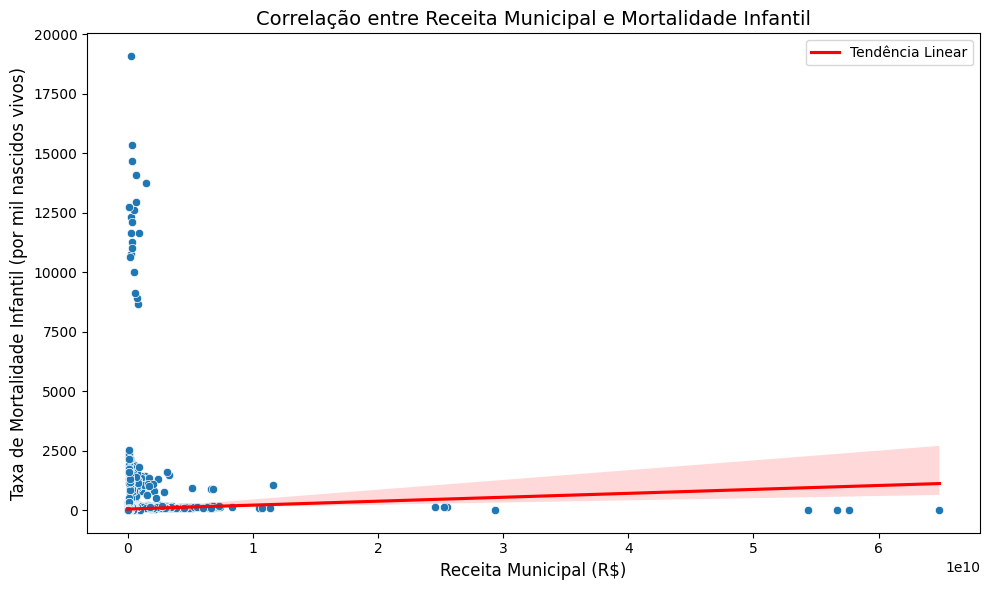

In [62]:
df_br['Taxa_Mortalidade_Infantil'] = (df_br['NrObitosInfantis'] / df_br['NrNascimentos']) * 1000

correlacao = df_br[['Receitas_R$', 'Taxa_Mortalidade_Infantil']].corr().iloc[0, 1]

print("Analisando a correlação entre a Receita Municipal e a Taxa de Mortalidade Infantil.")
print(f"A correlação entre as variáveis é de {correlacao:.2f}. Isso sugere que a relação entre essas variáveis é {'positiva' if correlacao > 0 else 'negativa' if correlacao < 0 else 'nula'}.")
print("Se a correlação for positiva, significa que municípios com maior receita tendem a ter maior mortalidade infantil, enquanto uma correlação negativa indica o oposto.")
print("O gráfico a seguir ilustra essa relação, com a linha de tendência mostrando a correlação linear entre as duas variáveis.")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_br, x='Receitas_R$', y='Taxa_Mortalidade_Infantil')
sns.regplot(data=df_br, x='Receitas_R$', y='Taxa_Mortalidade_Infantil', scatter=False, color='red', label='Tendência Linear')

plt.title('Correlação entre Receita Municipal e Mortalidade Infantil', fontsize=14)
plt.xlabel('Receita Municipal (R$)', fontsize=12)
plt.ylabel('Taxa de Mortalidade Infantil (por mil nascidos vivos)', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

###Pergunta 08

Há relação direta entre área plantada/colhida e valor total da produção agrícola?

<ipython-input-63-5e528c71ab5f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Razao_Area'] = df_filtered['AreaColhida_h'] / df_filtered['AreaPlantada_h']
<ipython-input-63-5e528c71ab5f>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_area_plantada = df_filtered.groupby('Ano').apply(lambda x: x.nlargest(5, 'AreaPlantada_h')).reset_index(drop=True)


Top 5 cidades com menor razão entre AreaPlantada e AreaColhida e suas Produções Agrícolas:
     Ano               Municipio  Razao_Area  VlProducaoAgricola
0   2016             Paragominas    1.000000                6810
1   2016               Cruz Alta    1.000000                3040
2   2016            Santa Carmem    0.817814                9630
3   2016             Paranatinga    1.000000                6890
4   2016            Nova Ubiratã    0.876416                5019
5   2017   São Félix do Araguaia    1.000000                7170
6   2017            Aral Moreira    1.000000                2590
7   2017        Tangará da Serra    1.000000                7540
8   2017                Canarana    1.000000                7730
9   2017         Campos de Júlio    0.585492                 430
10  2018                 Amambaí    1.000000                5870
11  2018        Novo São Joaquim    1.000000                8970
12  2018  Santo Antônio do Leste    1.000000                8590

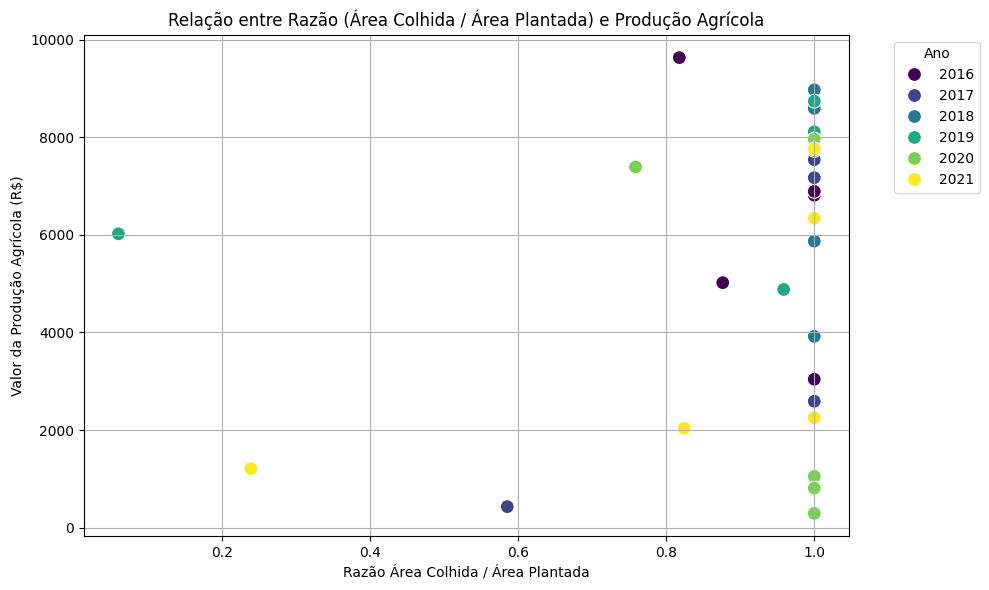

In [63]:
df_filtered = df_br[(df_br['AreaPlantada_h'] > 0) & (df_br['AreaColhida_h'] > 0) & (df_br['VlProducaoAgricola'] > 0)]
df_filtered['Razao_Area'] = df_filtered['AreaColhida_h'] / df_filtered['AreaPlantada_h']

# Para cada ano, pegar as 5 cidades com maior valor em AreaPlantada_h
top_5_area_plantada = df_filtered.groupby('Ano').apply(lambda x: x.nlargest(5, 'AreaPlantada_h')).reset_index(drop=True)

# Calcular a razão entre Área Colhida e Área Plantada para essas cidades
top_5_area_plantada['Razao_Area'] = top_5_area_plantada['AreaColhida_h'] / top_5_area_plantada['AreaPlantada_h']

# Exibir as cidades e suas respectivas Produções Agrícolas
print("Top 5 cidades com menor razão entre AreaPlantada e AreaColhida e suas Produções Agrícolas:")
print(top_5_area_plantada[['Ano', 'Municipio', 'Razao_Area', 'VlProducaoAgricola']])


# Plotando o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_5_area_plantada, x='Razao_Area', y='VlProducaoAgricola', hue='Ano', palette='viridis', s=100)

plt.title('Relação entre Razão (Área Colhida / Área Plantada) e Produção Agrícola')
plt.xlabel('Razão Área Colhida / Área Plantada')
plt.ylabel('Valor da Produção Agrícola (R$)')
plt.grid(True)
plt.legend(title='Ano', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Pergunta 08 (Outra Versão)

Há relação direta entre área plantada/colhida e valor total da produção agrícola?

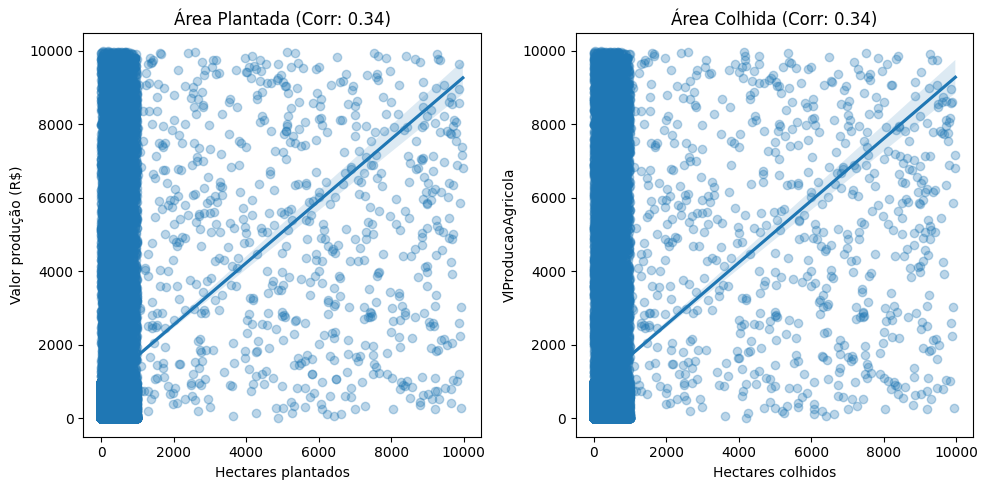


Correlação Área Plantada x Valor Produção: 0.34
Correlação Área Colhida x Valor Produção: 0.34

Conclusão: Relação fraca - a área não é o principal determinante do valor


In [64]:
# 1. Cálculo de correlações
corr_plantada = df_br['AreaPlantada_h'].corr(df_br['VlProducaoAgricola'])
corr_colhida = df_br['AreaColhida_h'].corr(df_br['VlProducaoAgricola'])

# 2. Gráfico combinado
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.regplot(x='AreaPlantada_h', y='VlProducaoAgricola', data=df_br, scatter_kws={'alpha':0.3})
plt.title(f'Área Plantada (Corr: {corr_plantada:.2f})')
plt.xlabel('Hectares plantados')
plt.ylabel('Valor produção (R$)')

plt.subplot(1, 2, 2)
sns.regplot(x='AreaColhida_h', y='VlProducaoAgricola', data=df_br, scatter_kws={'alpha':0.3})
plt.title(f'Área Colhida (Corr: {corr_colhida:.2f})')
plt.xlabel('Hectares colhidos')

plt.tight_layout()
plt.show()

# 3. Saída numérica
print(f"\nCorrelação Área Plantada x Valor Produção: {corr_plantada:.2f}")
print(f"Correlação Área Colhida x Valor Produção: {corr_colhida:.2f}")

if corr_colhida > 0.7:
    print("\nConclusão: Há forte relação direta entre área e valor da produção")
elif corr_colhida > 0.4:
    print("\nConclusão: Relação moderada - outros fatores também influenciam")
else:
    print("\nConclusão: Relação fraca - a área não é o principal determinante do valor")


###Pergunta 09

Municípios com maior volume de exportações apresentam melhores indicadores econômicos?

<ipython-input-65-734b056ed8f3>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_exportacoes_5 = top_exportacoes.groupby('Ano').apply(lambda x: x.nlargest(5, 'Exportacoes_US$')).reset_index(drop=True)
<ipython-input-65-734b056ed8f3>:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_receitas_5 = top_receitas.groupby('Ano').apply(lambda x: x.nlargest(5, 'Receitas_R$')).reset_index(drop=True)
<ipython-

Top 5 cidades por Exportações e suas Receitas:
     Ano            Municipio  Exportacoes_US$   Receitas_R$
0   2016            São Paulo     9.042182e+09  5.433282e+10
1   2016               Manaus     6.209818e+09  5.432635e+09
2   2016               Itajaí     4.415417e+09  1.381083e+09
3   2016       Rio de Janeiro     3.933208e+09  2.934882e+10
4   2016  São José dos Campos     3.006063e+09  2.825081e+09
5   2017            São Paulo     1.006167e+10  5.761756e+10
6   2017               Manaus     8.537609e+09  5.044353e+09
7   2017               Itajaí     5.539622e+09  1.458058e+09
8   2017       Rio de Janeiro     4.187085e+09  2.454225e+10
9   2017             Camaçari     3.031256e+09  1.242387e+09
10  2018            São Paulo     1.049448e+10  5.668220e+10
11  2018               Manaus     9.919779e+09  5.595241e+09
12  2018       Rio de Janeiro     9.046463e+09  2.550691e+10
13  2018                Macaé     7.620277e+09  2.620953e+09
14  2018               Itajaí     6.70

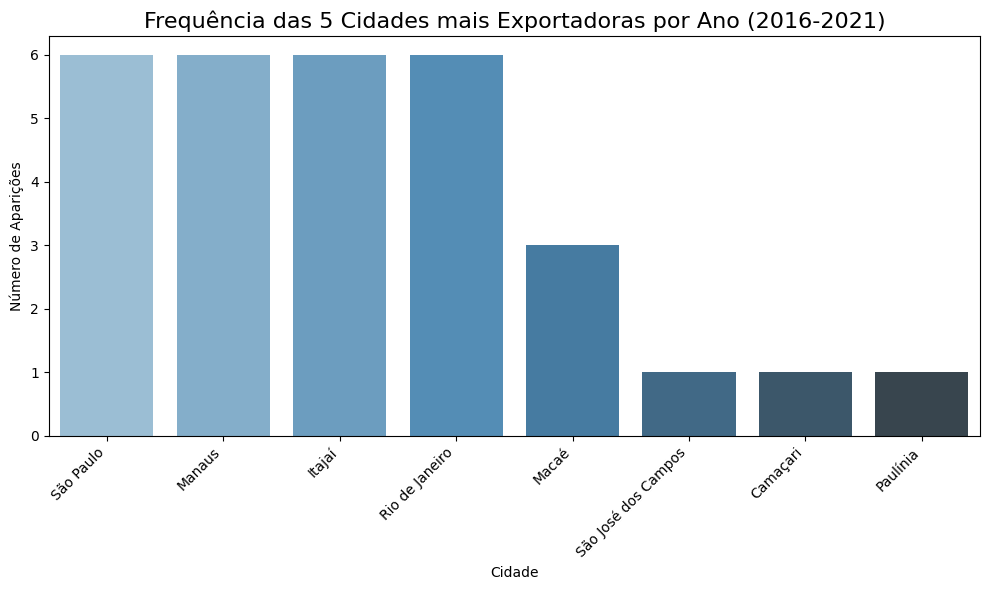

<ipython-input-65-734b056ed8f3>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_receitas_freq.index, y=city_receitas_freq.values, palette='Greens_d')


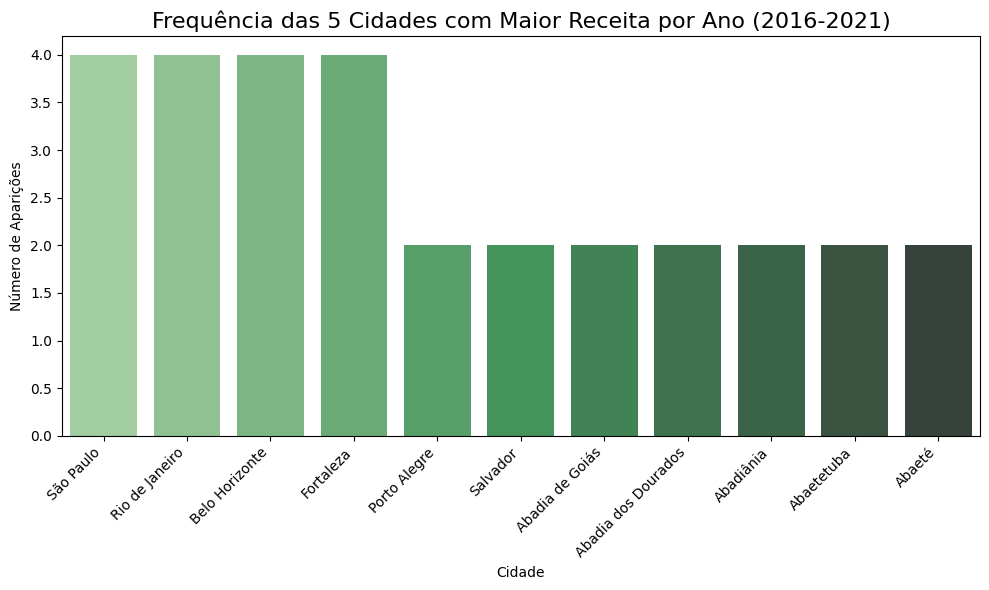

In [65]:
df = df_br[df_br['Ano'].between(2016, 2021)]

# Etapa 1: 5 cidades com maior valor de Exportações (US$) para cada ano e seus valores de Receitas (R$)
top_exportacoes = df_br.groupby(['Ano', 'Municipio'])[['Exportacoes_US$', 'Receitas_R$']].sum().reset_index()

top_exportacoes_5 = top_exportacoes.groupby('Ano').apply(lambda x: x.nlargest(5, 'Exportacoes_US$')).reset_index(drop=True)

city_export_freq = top_exportacoes_5['Municipio'].value_counts()

# Etapa 2: 5 cidades com maior valor de Receitas (R$) para cada ano e seus valores de Exportações (US$)
top_receitas = df.groupby(['Ano', 'Municipio'])[['Receitas_R$', 'Exportacoes_US$']].sum().reset_index()

top_receitas_5 = top_receitas.groupby('Ano').apply(lambda x: x.nlargest(5, 'Receitas_R$')).reset_index(drop=True)

city_receitas_freq = top_receitas_5['Municipio'].value_counts()

# Exibindo os dois dataframes
print("Top 5 cidades por Exportações e suas Receitas:")
print(top_exportacoes_5[['Ano', 'Municipio', 'Exportacoes_US$', 'Receitas_R$']])

print("\nTop 5 cidades por Receitas e suas Exportações:")
print(top_receitas_5[['Ano', 'Municipio', 'Receitas_R$', 'Exportacoes_US$']])


## Plotando os gráficos
#Frequencia das cidades que mais exportam
plt.figure(figsize=(10, 6))
sns.barplot(x=city_export_freq.index, y=city_export_freq.values, palette='Blues_d')
plt.title('Frequência das 5 Cidades mais Exportadoras por Ano (2016-2021)', fontsize=16)
plt.xlabel('Cidade')
plt.ylabel('Número de Aparições')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=city_receitas_freq.index, y=city_receitas_freq.values, palette='Greens_d')
plt.title('Frequência das 5 Cidades com Maior Receita por Ano (2016-2021)', fontsize=16)
plt.xlabel('Cidade')
plt.ylabel('Número de Aparições')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###Pergunta 10

Qual foi o impacto da pandemia nos fluxos de importação e exportação por região?

<>:3: DeprecationWarning: invalid escape sequence '\.'
<>:3: DeprecationWarning: invalid escape sequence '\.'
<ipython-input-66-0a5e1acc1cc5>:3: DeprecationWarning: invalid escape sequence '\.'
  df_br[col] = df_br[col].replace({'-': None, ',': '', '\.': ''}, regex=True)
<ipython-input-66-0a5e1acc1cc5>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=fluxos_melt, x='Regiao', y='Valor', hue='Ano', ci=None, palette='viridis', dodge=True)


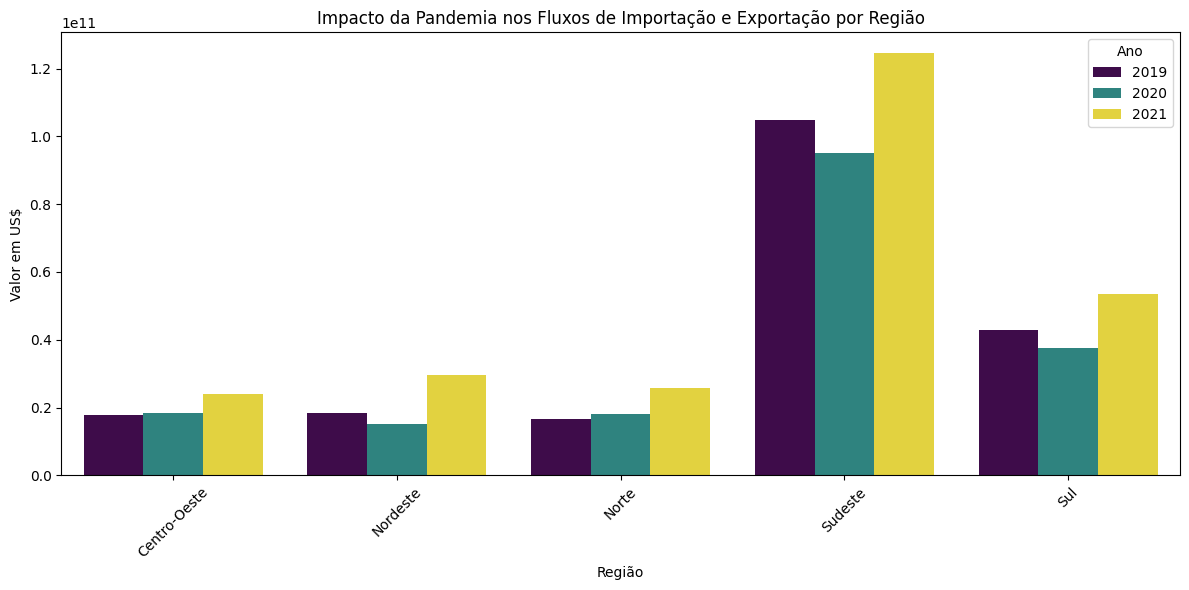

In [66]:
colunas_convert = ['Importacoes_US$', 'Exportacoes_US$', 'Ano']
for col in colunas_convert:
    df_br[col] = df_br[col].replace({'-': None, ',': '', '\.': ''}, regex=True)
    df_br[col] = pd.to_numeric(df_br[col], errors='coerce')

df_pandemia = df_br[df_br['Ano'].isin([2019, 2020, 2021])]

fluxos = df_pandemia.groupby(['Ano', 'Regiao'])[['Importacoes_US$', 'Exportacoes_US$']].sum().reset_index()

fluxos_melt = fluxos.melt(
    id_vars=['Ano', 'Regiao'],
    value_vars=['Importacoes_US$', 'Exportacoes_US$'],
    var_name='Tipo', value_name='Valor'
)

# Gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=fluxos_melt, x='Regiao', y='Valor', hue='Ano', ci=None, palette='viridis', dodge=True)
plt.title('Impacto da Pandemia nos Fluxos de Importação e Exportação por Região')
plt.ylabel('Valor em US$')
plt.xlabel('Região')
plt.xticks(rotation=45)
plt.legend(title='Ano')
plt.tight_layout()
plt.show()

###Pergunta 11

###Pergunta 12

###Pergunta 13


###Pergunta 14